In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import pymongo
from pymongo import MongoClient
import math
from datetime import datetime
from datetime import timedelta, date
import seaborn as sns # seaborn for visualization
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans #kmean
from scipy.spatial.distance import cdist #cdist (for compute centroid)
from sklearn import metrics 
import numpy.matlib
from functools import reduce
import scipy.optimize as sco
from sklearn.impute import SimpleImputer

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('mode.sim_interactive', True)

In [3]:
pd.get_option("display.max_rows")

1500

In [4]:
get_proj_id_df = pd.read_csv("../dataset/list_fund.csv") 
get_proj_id_df

proj_id     regis_id  \
0     M0746_2550     353_2550   
1     M0843_2548     205_2548   
2     M0626_2551     545_2551   
3     M0728_2547     118_2547   
4     M0032_2551     154_2551   
5     M0437_2554  MF0442_2554   
6     M0276_2554  MF0232_2554   
7     M0430_2550     044_2551   
8     M0597_2547     069_2547   
9     M0364_2548     075_2548   
10    M0199_2550     180_2550   
11    M0235_2551     266_2551   
12    M0280_2548     073_2548   
13    M0242_2550     176_2550   
14    M0584_2553     535_2553   
15    M0562_2558  MF0555_2558   
16    M0582_2548     122_2548   
17    M0774_2554  MF0654_2554   
18    M0027_2541     004_2541   
19    M0401_2552     381_2552   
20    M0363_2549     311_2549   
21    M0458_2557  MF0721_2557   
22    M0066_2546     022_2546   
23    M0145_2549     036_2549   
24    M0020_2539     014_2540   
25    M0157_2550     111_2551   
26    M0041_2554  MF0125_2554   
27    M0348_2555  MF0397_2555   
28    M0532_2556  MF0527_2556   
29    M0698_2547     082_2547   
30    M0529_2559  MF0530_2559   
31    M0527_2556  MF0577_2556   
32    M0140_2545     063_2545   
33    M0141_2545     064_2545   
34    M0035_2547     013_2547   
35    M0413_2548     076_2548   
36    M0071_2546     029_2546   
37    M0285_2546     066_2546   
38    M0065_2549     071_2549   
39    M0810_2554  MF0069_2555   
40    M0256_2550     212_2550   
41    M0023_2536     005_2537   
42    M0076_2545     022_2545   
43    M0147_2549     130_2549   
44    M0142_2542     025_2542   
45    M0502_2556  MF0429_2556   
46    M0374_2559  MF0315_2559   
47    M0449_2559  MF0371_2559   
48    M0480_2559  MF0422_2559   
49    M0485_2559  MF0461_2559   
50    M0570_2558  MF0489_2558   
51    M0239_2559  MF0201_2559   
52    M0692_2558  MF0606_2558   
53    M0428_2550     338_2550   
54    M0424_2550     398_2550   
55    M0227_2557  MF0444_2557   
56    M0056_2561  MF0085_2561   
57    M0656_2559  MF0042_2560   
58    M0776_2547     113_2547   
59    M1202_2557  MF0419_2558   
60    M0815_2557  MF0074_2558   
61    M0347_2560  MF0321_2560   
62    M0787_2547     115_2547   
63    M0760_2548     160_2548   
64    M0644_2547     109_2547   
65    M0400_2549     330_2549   
66    M0206_2552     241_2552   
67    M0441_2552     035_2553   
68    M0592_2547     095_2547   
69    M0785_2547     114_2547   
70    M0146_2549     136_2549   
71    M0177_2557  MF0851_2557   
72    M0187_2552     227_2552   
73    M0051_2556  MF0217_2556   
74    M0417_2560  MF0370_2560   
75    M0542_2560  MF0473_2560   
76    M0257_2552     265_2552   
77    M0333_2560  MF0322_2560   
78    M0568_2560  MF0472_2560   
79    M0821_2556  MF0775_2556   
80    M0134_2554  MF0712_2556   
81    M0318_2554  MF0282_2554   
82    M0375_2554  MF0335_2554   
83    M0301_2552     305_2552   
84    M0610_2551     497_2551   
85    M0738_2554  MF0517_2554   
86    M0104_2557  MF0294_2557   
87    M0629_2560  MF0009_2561   
88    M0715_2548     140_2548   
89    M0023_2547     041_2547   
90    M0057_2559  MF0140_2559   
91    M0148_2560  MF0238_2560   
92    M0663_2557  MF0210_2558   
93    M0404_2560  MF0388_2560   
94    M0651_2560  MF0062_2561   
95    M0033_2544     026_2545   
96    M0349_2558  MF0505_2558   
97    M0495_2558  MF0574_2558   
98    M0282_2559  MF0365_2559   
99    M0311_2559  MF0364_2559   
100   M0121_2560  MF0208_2560   
101   M0452_2560  MF0475_2560   
102   M0012_2537     035_2537   
103   M0667_2559  MF0102_2560   
104   M0570_2547     087_2547   
105   M0772_2557  MF0811_2557   
106   M0943_2555  MF0500_2556   
107   M0556_2560  MF0023_2561   
108   M0775_2554  MF0749_2555   
109   M0419_2560  MF0412_2560   
110   M0934_2547     030_2548   
111   M0089_2561  MF0124_2561   
112   M0350_2554  MF0498_2555   
113   M0991_2550     369_2550   
114   M0034_2538     012_2538   
115   M0439_2559  MF0472_2559   
116   M0237_2557  MF0316_2557   
117   M0034_2539     060_2539   
118   M0324_2550     264_2550   
119   M0083_2558  MF0294_2558   
120   M0067_2545

In [5]:
proj_id_list = get_proj_id_df["proj_id"].tolist()
dfs = []
nav_df = []

In [6]:
location_prefix = "../dataset/return_sd/"
dfs = [pd.read_csv(f'{location_prefix}{p_id}.csv',parse_dates=True,index_col='date') for p_id in proj_id_list]

In [7]:
location_prefix = "../dataset/nav/"
nav_df = [pd.read_csv(f'{location_prefix}{p_id}.csv',parse_dates=True,index_col='nav_date') for p_id in proj_id_list]

_____

CFP initialization

In [8]:
CFP_port_Conservative = ["KT-ST","K-FIXED","ONE-DI","TMBABF","LHTPROP","ONE-EC14","K-VALUE","K-MIDSMALL","K-GOLD"]
CFP_port_Moderate = ["K-FIXED","K-APB","LHTPROP","ONE-EC14","K-VALUE","K-MIDSMALL","ONE-UGG","K-GOLD"]
CFP_port_Aggressive = ["LHTPROP","ONE-EC14","K-VALUE","K-MIDSMALL","ONE-UGG","K-ASIA"]

In [9]:
CFP_port_Conservative_weight = np.array([0.1,0.15,0.15,0.1,0.2,0.05,0.1,0.1,0.05])
CFP_port_Moderate_weight = np.array([0.05,0.1,0.2,0.1,0.25,0.1,0.1,0.1])
CFP_port_Aggressive_weight = np.array([0.1,0.15,0.15,0.15,0.25,0.2])

In [10]:
print("length_con :",len(CFP_port_Conservative),len(CFP_port_Conservative_weight)," sum: ",sum(CFP_port_Conservative_weight))
print("length_mod :",len(CFP_port_Moderate),len(CFP_port_Moderate_weight)," sum: ",sum(CFP_port_Moderate_weight))
print("length_agg :",len(CFP_port_Aggressive),len(CFP_port_Aggressive_weight)," sum: ",sum(CFP_port_Aggressive_weight))

length_con : 9 9  sum:  1.0
length_mod : 8 8  sum:  1.0
length_agg : 6 6  sum:  1.0


In [11]:
start_date= "2013"
end_date = "2018"

______________________

Insert Column Fund_abbr_name and concatinating all dataframe

In [12]:
proj_abbr_list = get_proj_id_df["proj_abbr_name"].tolist() # GET ONLY proj_abbr to list
proj_ass_lvl1 = get_proj_id_df["asset_lv1_code"].tolist()

In [13]:
for return_df_index in range(0,len(dfs)):
    dfs[return_df_index].insert(0,"proj_abbr_name", proj_abbr_list[return_df_index])
    dfs[return_df_index].insert(1,"asset_lvl_1", proj_ass_lvl1[return_df_index])
    dfs[return_df_index] = dfs[return_df_index].sort_index()
#insert column to return

In [14]:
for nav_index in range(0,len(nav_df)):
    nav_df[nav_index].insert(0,"proj_abbr_name", proj_abbr_list[nav_index])
    nav_df[nav_index].insert(1,"asset_lvl_1", proj_ass_lvl1[nav_index])
    nav_df[nav_index] = nav_df[nav_index].sort_index()

In [15]:
return_sd_df = pd.concat(dfs)

In [16]:
nav_df = pd.concat(nav_df)

_____

In [17]:
return_sd_df

proj_abbr_name asset_lvl_1      r_ytd     sd_ytd       r_3m  \
date                                                                     
2013-01-01      1AM-DAILY     CASH-TH        NaN        NaN   0.688011   
2013-01-02      1AM-DAILY     CASH-TH   0.033442   0.000000   0.714351   
2013-01-03      1AM-DAILY     CASH-TH   0.033442   0.000000   0.707019   
2013-01-04      1AM-DAILY     CASH-TH   0.048808   0.142952   0.715157   
2013-01-07      1AM-DAILY     CASH-TH   0.069596   0.119803   0.729668   
...                   ...         ...        ...        ...        ...   
2020-04-30       VFOCUS-D       EQ-TH -20.908769  42.597851 -16.686319   
2020-05-01       VFOCUS-D       EQ-TH -20.418747  42.347358 -16.170136   
2020-05-04       VFOCUS-D       EQ-TH -19.388443  42.163809 -13.205018   
2020-05-05       VFOCUS-D       EQ-TH -19.388443  42.163809 -13.205018   
2020-05-06       VFOCUS-D       EQ-TH -19.388443  42.163809 -15.862324   

                sd_3m       r_6m      sd_6m       r_1y      sd_1y       r_2y  \
date                                                                           
2013-01-01   0.115225   1.404139   0.124241   2.785210   0.121076   2.574465   
2013-01-02   0.123234   1.414813   0.127094   2.819584   0.122880   2.591615   
2013-01-03   0.123927   1.407380   0.127481   2.819584   0.122880   2.591615   
2013-01-04   0.123794   1.415522   0.127475   2.800041   0.120721   2.585349   
2013-01-07   0.124556   1.419869   0.128503   2.806125   0.121220   2.593568   
...               ...        ...        ...        ...        ...        ...   
2020-04-30  47.441430 -24.403345  38.378062 -26.730368  28.096744 -15.943411   
2020-05-01  47.072535 -22.760280  38.348552 -26.276415  28.040494 -15.683420   
2020-05-04  47.006473 -21.760291  38.231682 -25.684470  28.147013 -15.032226   
2020-05-05  47.006473 -21.760291  38.231682 -25.684470  28.147013 -15.032226   
2020-05-06  46.887332 -21.760291  38.231682 -25.684470  28.147013 -15.032226   

                sd_2y      r_3y      sd_3y      r_4y      sd_4y      r_5y  \
date                                                                        
2013-01-01   0.120535  2.025991   0.112925  1.739569   0.106580  1.968525   
2013-01-02   0.121530  2.037363   0.113808  1.748074   0.107364  1.969655   
2013-01-03   0.121530  2.037363   0.113808  1.748074   0.107364  1.968030   
2013-01-04   0.120962  2.038996   0.113875  1.751981   0.107388  1.969740   
2013-01-07   0.120886  2.043778   0.114087  1.745937   0.106914  1.969509   
...               ...       ...        ...       ...        ...       ...   
2020-04-30  20.764770 -8.301378  18.345586 -6.558489  17.281177 -6.901917   
2020-05-01  20.747977 -8.112390  18.336511 -6.414091  17.275119 -6.786841   
2020-05-04  20.805433 -7.931327  18.376143 -6.020161  17.297202 -6.546723   
2020-05-05  20.805433 -7.851774  18.388915 -6.020161  17.297202 -6.546723   
2020-05-06  20.805433 -7.851774  18.388915 -6.020161  17.297202 -6.386953   

                sd_5y  
date                   
2013-01-01   0.111325  
2013-01-02   0.111558  
2013-01-03   0.111605  
2013-01-04   0.111652  
2013-01-07   0.111625  
...               ...  
2020-04-30  16.921969  
2020-05-01  16.917374  
2020-05-04  16.921098  
2020-05-05  16.921098  
2020-05-06  16.923990  

[2413503 rows x 18 columns]

In [18]:
nav_df

proj_abbr_name asset_lvl_1     net_asset  last_val  previous_val  \
nav_date                                                                      
2007-11-26      1AM-DAILY     CASH-TH  3.409008e+08   10.0129        0.0000   
2007-11-27      1AM-DAILY     CASH-TH  3.348462e+08   10.0136        0.0000   
2007-11-28      1AM-DAILY     CASH-TH  3.038578e+08   10.0144        0.0000   
2007-11-29      1AM-DAILY     CASH-TH  3.049050e+08   10.0151        0.0000   
2007-12-03      1AM-DAILY     CASH-TH  3.381022e+08   10.0178        0.0000   
...                   ...         ...           ...       ...           ...   
2020-04-27       VFOCUS-D       EQ-TH  1.735234e+09    6.9004        6.8601   
2020-04-28       VFOCUS-D       EQ-TH  1.741096e+09    6.9242        6.9004   
2020-04-29       VFOCUS-D       EQ-TH  1.751860e+09    6.9671        6.9242   
2020-04-30       VFOCUS-D       EQ-TH  1.774539e+09    7.0573        6.9671   
2020-05-05       VFOCUS-D       EQ-TH  1.749764e+09    6.9576        7.0573   

            sell_price  buy_price  sell_swap_price  buy_swap_price remark_th  \
nav_date                                                                       
2007-11-26     10.0130    10.0129           0.0000          0.0000       NaN   
2007-11-27     10.0137    10.0136           0.0000          0.0000       NaN   
2007-11-28     10.0145    10.0144           0.0000          0.0000       NaN   
2007-11-29     10.0152    10.0151           0.0000          0.0000       NaN   
2007-12-03     10.0179    10.0178           0.0000          0.0000       NaN   
...                ...        ...              ...             ...       ...   
2020-04-27      6.9695     6.9004           6.9695          6.9004             
2020-04-28      6.9935     6.9242           6.9935          6.9242             
2020-04-29      7.0369     6.9671           7.0369          6.9671             
2020-04-30      7.1280     7.0573           7.1280          7.0573             
2020-05-05      7.0273     6.9576           7.0273          6.9576             

           remark_en  
nav_date              
2007-11-26       NaN  
2007-11-27       NaN  
2007-11-28       NaN  
2007-11-29       NaN  
2007-12-03       NaN  
...              ...  
2020-04-27            
2020-04-28            
2020-04-29            
2020-04-30            
2020-05-05            

[2155024 rows x 11 columns]

In [19]:
nav_fee_df = pd.pivot_table(nav_df.loc["2013":"2018"],columns="proj_abbr_name", values="buy_price",index='nav_date')

In [20]:
return_sd_df

proj_abbr_name asset_lvl_1      r_ytd     sd_ytd       r_3m  \
date                                                                     
2013-01-01      1AM-DAILY     CASH-TH        NaN        NaN   0.688011   
2013-01-02      1AM-DAILY     CASH-TH   0.033442   0.000000   0.714351   
2013-01-03      1AM-DAILY     CASH-TH   0.033442   0.000000   0.707019   
2013-01-04      1AM-DAILY     CASH-TH   0.048808   0.142952   0.715157   
2013-01-07      1AM-DAILY     CASH-TH   0.069596   0.119803   0.729668   
...                   ...         ...        ...        ...        ...   
2020-04-30       VFOCUS-D       EQ-TH -20.908769  42.597851 -16.686319   
2020-05-01       VFOCUS-D       EQ-TH -20.418747  42.347358 -16.170136   
2020-05-04       VFOCUS-D       EQ-TH -19.388443  42.163809 -13.205018   
2020-05-05       VFOCUS-D       EQ-TH -19.388443  42.163809 -13.205018   
2020-05-06       VFOCUS-D       EQ-TH -19.388443  42.163809 -15.862324   

                sd_3m       r_6m      sd_6m       r_1y      sd_1y       r_2y  \
date                                                                           
2013-01-01   0.115225   1.404139   0.124241   2.785210   0.121076   2.574465   
2013-01-02   0.123234   1.414813   0.127094   2.819584   0.122880   2.591615   
2013-01-03   0.123927   1.407380   0.127481   2.819584   0.122880   2.591615   
2013-01-04   0.123794   1.415522   0.127475   2.800041   0.120721   2.585349   
2013-01-07   0.124556   1.419869   0.128503   2.806125   0.121220   2.593568   
...               ...        ...        ...        ...        ...        ...   
2020-04-30  47.441430 -24.403345  38.378062 -26.730368  28.096744 -15.943411   
2020-05-01  47.072535 -22.760280  38.348552 -26.276415  28.040494 -15.683420   
2020-05-04  47.006473 -21.760291  38.231682 -25.684470  28.147013 -15.032226   
2020-05-05  47.006473 -21.760291  38.231682 -25.684470  28.147013 -15.032226   
2020-05-06  46.887332 -21.760291  38.231682 -25.684470  28.147013 -15.032226   

                sd_2y      r_3y      sd_3y      r_4y      sd_4y      r_5y  \
date                                                                        
2013-01-01   0.120535  2.025991   0.112925  1.739569   0.106580  1.968525   
2013-01-02   0.121530  2.037363   0.113808  1.748074   0.107364  1.969655   
2013-01-03   0.121530  2.037363   0.113808  1.748074   0.107364  1.968030   
2013-01-04   0.120962  2.038996   0.113875  1.751981   0.107388  1.969740   
2013-01-07   0.120886  2.043778   0.114087  1.745937   0.106914  1.969509   
...               ...       ...        ...       ...        ...       ...   
2020-04-30  20.764770 -8.301378  18.345586 -6.558489  17.281177 -6.901917   
2020-05-01  20.747977 -8.112390  18.336511 -6.414091  17.275119 -6.786841   
2020-05-04  20.805433 -7.931327  18.376143 -6.020161  17.297202 -6.546723   
2020-05-05  20.805433 -7.851774  18.388915 -6.020161  17.297202 -6.546723   
2020-05-06  20.805433 -7.851774  18.388915 -6.020161  17.297202 -6.386953   

                sd_5y  
date                   
2013-01-01   0.111325  
2013-01-02   0.111558  
2013-01-03   0.111605  
2013-01-04   0.111652  
2013-01-07   0.111625  
...               ...  
2020-04-30  16.921969  
2020-05-01  16.917374  
2020-05-04  16.921098  
2020-05-05  16.921098  
2020-05-06  16.923990  

[2413503 rows x 18 columns]

In [21]:
return_df_pivot = pd.pivot_table(return_sd_df.loc["2013":"2018"],columns="proj_abbr_name", values="r_1y",index='date')

In [22]:
return_df_pivot

proj_abbr_name  1AM-DAILY    1AM-GEM    1AM-TG    1AMGBF    1AMGFF       1DIV  \
date                                                                            
2013-01-01       2.785210   8.785861  3.044062  4.010499  3.913098  20.075093   
2013-01-02       2.819584  11.203521  3.080233  4.010499  3.913098  21.820919   
2013-01-03       2.819584  11.595036  3.080233  4.010499  3.913098  21.820919   
2013-01-04       2.800041  10.496333  3.066089  4.147410  4.323061  21.397949   
2013-01-07       2.806125  10.888312  3.070438  5.014503  4.531707  20.836952   
...                   ...        ...       ...       ...       ...        ...   
2018-12-25       0.964328 -25.829876  0.868157 -0.573880 -3.071620 -13.874465   
2018-12-26       0.965135 -25.348018  0.868990 -0.573880 -3.071620 -13.570250   
2018-12-27       0.965103 -26.319427  0.871519 -0.573880 -3.071620 -13.448768   
2018-12-28       0.965911 -25.015982  0.872344 -0.724830 -3.123150 -12.213263   
2018-12-31       0.964232 -25.244591  0.870634 -0.839566 -3.449233 -12.371226   

proj_abbr_name  1FIX-3M1  1GLOBALBOND     1S-LTF    1SG-LTF  ...    UOBSJSM  \
date                                                         ...              
2013-01-01      3.177871     8.960009  39.374657  50.401594  ...        NaN   
2013-01-02      2.814209     9.391622  41.421051  52.532189  ...        NaN   
2013-01-03      2.814209     9.619965  41.421051  52.532189  ...        NaN   
2013-01-04      2.967717     9.017751  40.990288  51.595509  ...        NaN   
2013-01-07      2.952442     8.873741  40.654550  51.009530  ...        NaN   
...                  ...          ...        ...        ...  ...        ...   
2018-12-25           NaN    -4.657013 -10.358751  -8.095138  ... -14.239584   
2018-12-26           NaN    -4.717314 -10.608319  -8.270838  ... -14.633505   
2018-12-27           NaN    -5.003991 -11.026757  -8.671895  ... -18.120415   
2018-12-28           NaN    -4.890394  -9.531876  -7.356345  ... -13.550418   
2018-12-31           NaN    -4.925524 -10.085079  -7.881006  ... -13.197261   

proj_abbr_name     UOBSMG  UOBSVRMF    UPINCM   UTHAICG      UTSME  UTSME-LTF  \
date                                                                            
2013-01-01      60.472845  2.822787       NaN       NaN        NaN        NaN   
2013-01-02      62.177740  2.857956       NaN       NaN        NaN        NaN   
2013-01-03      61.448213  2.867167       NaN       NaN        NaN        NaN   
2013-01-04      60.548083  2.830836       NaN       NaN        NaN        NaN   
2013-01-07      60.997892  2.831989       NaN       NaN        NaN        NaN   
...                   ...       ...       ...       ...        ...        ...   
2018-12-25     -18.264716  0.911486 -5.664629 -9.083970 -19.969084 -21.020526   
2018-12-26     -18.682496  0.911458 -5.792036 -9.156100 -19.986533 -21.103913   
2018-12-27     -19.022472  0.919655 -5.805632 -9.445034 -20.637457 -21.766671   
2018-12-28     -17.459351  0.929369 -5.865290 -8.093181 -19.555854 -20.784104   
2018-12-31     -17.985321  0.924083 -5.928059 -8.399036 -20.145749 -21.343570   

proj_abbr_name      V-RMF  VALUE-D LTF   VFOCUS-D  
date                                               
2013-01-01      39.161293    40.981272        NaN  
2013-01-02      40.862049    43.240118        NaN  
2013-01-03      40.862049    42.511121        NaN  
2013-01-04      40.075774    42.590244        NaN  
2013-01-07      39.905635    42.258181        NaN  
...                   ...          ...        ...  
2018-12-25      -7.924104   -15.881425 -13.491349  
2018-12-26      -8.159975   -16.192338 -13.723966  
2018-12-27      -8.637424   -16.417606 -14.297936  
2018-12-28      -7.194877   -14.751493 -12.797869  
2018-12-31      -7.746597   -15.316414 -13.284945  

[1565 rows x 953 columns]

In [23]:
sd_df_pivot = pd.pivot_table(return_sd_df.loc["2013":"2018"],columns="proj_abbr_name", values="sd_1y",index='date')

In [24]:
sd_df_pivot

proj_abbr_name  1AM-DAILY    1AM-GEM    1AM-TG    1AMGBF    1AMGFF       1DIV  \
date                                                                            
2013-01-01       0.121076  12.523595  0.150458  7.639462  6.651160  13.240105   
2013-01-02       0.122880  12.689938  0.151902  7.623811  6.637538  13.285609   
2013-01-03       0.122880  12.667942  0.151902  7.623811  6.637538  13.285609   
2013-01-04       0.120721  12.604152  0.151215  7.611598  6.590710  13.267885   
2013-01-07       0.121220  12.622284  0.151395  7.604303  6.526185  13.286048   
...                   ...        ...       ...       ...       ...        ...   
2018-12-25       0.043855  16.742755  0.039427  2.119542  3.417547  13.888765   
2018-12-26       0.043836  16.768263  0.039396  2.119542  3.417547  13.887137   
2018-12-27       0.043836  16.774639  0.039357  2.119542  3.417547  13.885956   
2018-12-28       0.043817  16.882057  0.039344  2.124896  3.417769  13.899455   
2018-12-31       0.043846  16.911208  0.039379  2.125846  3.406269  13.926068   

proj_abbr_name  1FIX-3M1  1GLOBALBOND     1S-LTF    1SG-LTF  ...    UOBSJSM  \
date                                                         ...              
2013-01-01      1.804644     5.100446  13.326204  12.998437  ...        NaN   
2013-01-02      1.838231     5.102979  13.366249  13.032536  ...        NaN   
2013-01-03      1.838231     5.095556  13.366249  13.032536  ...        NaN   
2013-01-04      1.847251     5.064937  13.350766  13.014591  ...        NaN   
2013-01-07      1.851045     5.067714  13.381078  13.039790  ...        NaN   
...                  ...          ...        ...        ...  ...        ...   
2018-12-25           NaN     2.521484  12.131319  11.950859  ...  18.305301   
2018-12-26           NaN     2.519467  12.130037  11.950192  ...  18.297865   
2018-12-27           NaN     2.502008  12.138726  11.956691  ...  18.611973   
2018-12-28           NaN     2.500236  12.173118  11.983894  ...  19.686670   
2018-12-31           NaN     2.504664  12.180052  11.993136  ...  19.723836   

proj_abbr_name     UOBSMG  UOBSVRMF    UPINCM    UTHAICG      UTSME  \
date                                                                  
2013-01-01      12.133627  0.148578       NaN        NaN        NaN   
2013-01-02      12.139841  0.150027       NaN        NaN        NaN   
2013-01-03      12.132993  0.149741       NaN        NaN        NaN   
2013-01-04      12.119199  0.146849       NaN        NaN        NaN   
2013-01-07      12.127953  0.147315       NaN        NaN        NaN   
...                   ...       ...       ...        ...        ...   
2018-12-25      10.640566  0.087666  2.983599  11.620603  12.451287   
2018-12-26      10.629158  0.087666  2.984415  11.620821  12.451223   
2018-12-27      10.632018  0.088051  2.984224  11.620500  12.474196   
2018-12-28      10.734501  0.088335  2.983817  11.648280  12.506246   
2018-12-31      10.731809  0.088504  2.988509  11.666301  12.503887   

proj_abbr_name  UTSME-LTF      V-RMF  VALUE-D LTF   VFOCUS-D  
date                                                          
2013-01-01            NaN  12.959833    14.991202        NaN  
2013-01-02            NaN  12.979377    15.032380        NaN  
2013-01-03            NaN  12.979377    15.016532        NaN  
2013-01-04            NaN  12.953103    15.019629        NaN  
2013-01-07            NaN  12.978576    15.048833        NaN  
...                   ...        ...          ...        ...  
2018-12-25      12.744025  12.153669    11.447741  14.085370  
2018-12-26      12.743391  12.152620    11.440645  14.079853  
2018-12-27      12.764664  12.160507    11.444179  14.084751  
2018-12-28      12.800533  12.195508    11.529591  14.120067  
2018-12-31      12.800825  12.204019    11.529453  14.135333  

[1565 rows x 953 columns]

In [25]:
nav_df

proj_abbr_name asset_lvl_1     net_asset  last_val  previous_val  \
nav_date                                                                      
2007-11-26      1AM-DAILY     CASH-TH  3.409008e+08   10.0129        0.0000   
2007-11-27      1AM-DAILY     CASH-TH  3.348462e+08   10.0136        0.0000   
2007-11-28      1AM-DAILY     CASH-TH  3.038578e+08   10.0144        0.0000   
2007-11-29      1AM-DAILY     CASH-TH  3.049050e+08   10.0151        0.0000   
2007-12-03      1AM-DAILY     CASH-TH  3.381022e+08   10.0178        0.0000   
...                   ...         ...           ...       ...           ...   
2020-04-27       VFOCUS-D       EQ-TH  1.735234e+09    6.9004        6.8601   
2020-04-28       VFOCUS-D       EQ-TH  1.741096e+09    6.9242        6.9004   
2020-04-29       VFOCUS-D       EQ-TH  1.751860e+09    6.9671        6.9242   
2020-04-30       VFOCUS-D       EQ-TH  1.774539e+09    7.0573        6.9671   
2020-05-05       VFOCUS-D       EQ-TH  1.749764e+09    6.9576        7.0573   

            sell_price  buy_price  sell_swap_price  buy_swap_price remark_th  \
nav_date                                                                       
2007-11-26     10.0130    10.0129           0.0000          0.0000       NaN   
2007-11-27     10.0137    10.0136           0.0000          0.0000       NaN   
2007-11-28     10.0145    10.0144           0.0000          0.0000       NaN   
2007-11-29     10.0152    10.0151           0.0000          0.0000       NaN   
2007-12-03     10.0179    10.0178           0.0000          0.0000       NaN   
...                ...        ...              ...             ...       ...   
2020-04-27      6.9695     6.9004           6.9695          6.9004             
2020-04-28      6.9935     6.9242           6.9935          6.9242             
2020-04-29      7.0369     6.9671           7.0369          6.9671             
2020-04-30      7.1280     7.0573           7.1280          7.0573             
2020-05-05      7.0273     6.9576           7.0273          6.9576             

           remark_en  
nav_date              
2007-11-26       NaN  
2007-11-27       NaN  
2007-11-28       NaN  
2007-11-29       NaN  
2007-12-03       NaN  
...              ...  
2020-04-27            
2020-04-28            
2020-04-29            
2020-04-30            
2020-05-05            

[2155024 rows x 11 columns]

In [26]:
nav_df_allYear = pd.pivot_table(nav_df,columns="proj_abbr_name", values="last_val",index='nav_date')

In [27]:
nav_df_allYear

proj_abbr_name  1AM-DAILY  1AM-GEM   1AM-TG  1AMGBF  1AMGFF    1DIV  1FIX-3M1  \
nav_date                                                                        
1992-06-12            NaN      NaN      NaN     NaN     NaN     NaN       NaN   
1992-06-15            NaN      NaN      NaN     NaN     NaN     NaN       NaN   
1992-06-16            NaN      NaN      NaN     NaN     NaN     NaN       NaN   
1992-06-17            NaN      NaN      NaN     NaN     NaN     NaN       NaN   
1992-06-18            NaN      NaN      NaN     NaN     NaN     NaN       NaN   
...                   ...      ...      ...     ...     ...     ...       ...   
2020-04-27        12.3199   8.5734  12.0581     NaN     NaN  7.5557       NaN   
2020-04-28        12.3199   8.5337  12.0582     NaN     NaN  7.6000       NaN   
2020-04-29        12.3200   8.6599  12.0583     NaN     NaN  7.6672       NaN   
2020-04-30        12.3201   8.7251  12.0584     NaN     NaN  7.8617       NaN   
2020-05-05        12.3205   8.8585  12.0587     NaN     NaN  7.7418       NaN   

proj_abbr_name  1GLOBALBOND   1S-LTF  1SG-LTF  ...  UOBSJSM   UOBSMG  \
nav_date                                       ...                     
1992-06-12              NaN      NaN      NaN  ...      NaN      NaN   
1992-06-15              NaN      NaN      NaN  ...      NaN      NaN   
1992-06-16              NaN      NaN      NaN  ...      NaN      NaN   
1992-06-17              NaN      NaN      NaN  ...      NaN      NaN   
1992-06-18              NaN      NaN      NaN  ...      NaN      NaN   
...                     ...      ...      ...  ...      ...      ...   
2020-04-27          10.2029  17.7617  29.2096  ...  15.8499  58.5741   
2020-04-28          10.2079  17.8567  29.3565  ...  16.1131  58.8346   
2020-04-29          10.2216  17.9822  29.5550  ...  16.3305  58.9696   
2020-04-30          10.2295  18.2580  29.9910  ...  16.3305  59.4506   
2020-05-05          10.2576  17.9285  29.4672  ...  16.5950  58.8383   

proj_abbr_name  UOBSVRMF   UPINCM  UTHAICG    UTSME  UTSME-LTF    V-RMF  \
nav_date                                                                  
1992-06-12           NaN      NaN      NaN      NaN        NaN      NaN   
1992-06-15           NaN      NaN      NaN      NaN        NaN      NaN   
1992-06-16           NaN      NaN      NaN      NaN        NaN      NaN   
1992-06-17           NaN      NaN      NaN      NaN        NaN      NaN   
1992-06-18           NaN      NaN      NaN      NaN        NaN      NaN   
...                  ...      ...      ...      ...        ...      ...   
2020-04-27       13.7290  10.8016   7.6543  10.2609     6.9739  68.5316   
2020-04-28       13.7302  10.8150   7.6728  10.3305     7.0218  68.8543   
2020-04-29       13.7305  10.8097   7.7089  10.4871     7.1280  69.3508   
2020-04-30       13.7315  10.8352   7.8350  10.6292     7.2237  70.4118   
2020-05-05       13.7306  10.8465   7.7303  10.4701     7.1156  69.1424   

proj_abbr_name  VALUE-D LTF  VFOCUS-D  
nav_date                               
1992-06-12              NaN       NaN  
1992-06-15              NaN       NaN  
1992-06-16              NaN       NaN  
1992-06-17              NaN       NaN  
1992-06-18              NaN       NaN  
...                     ...       ...  
2020-04-27          19.8922    6.9004  
2020-04-28          20.0072    6.9242  
2020-04-29          20.0642    6.9671  
2020-04-30          20.2443    7.0573  
2020-05-05          20.0073    6.9576  

[6823 rows x 1187 columns]

In [28]:
nav_df_pivot = pd.pivot_table(nav_df.loc["2013":"2018"],columns="proj_abbr_name", values="last_val",index='nav_date')

In [29]:
nav_df_pivot

proj_abbr_name  1AM-DAILY  1AM-GEM   1AM-TG   1AMGBF   1AMGFF     1DIV  \
nav_date                                                                 
2013-01-02        11.0675  10.0548  10.8293  13.0373  12.3402  12.7834   
2013-01-03            NaN  10.0902      NaN      NaN      NaN      NaN   
2013-01-04        11.0692  10.1250  10.8307  12.9575  12.2710  12.8558   
2013-01-07        11.0715  10.0813  10.8326  13.0700  12.3384  12.8005   
2013-01-08        11.0723  10.0232  10.8334  12.9575  12.2710  12.7243   
2013-01-09        11.0730  10.0370  10.8341  12.9575  12.2710  12.7843   
2013-01-10        11.0738  10.0726  10.8350  12.9575  12.2710  12.6813   
2013-01-11        11.0748  10.0025  10.8356  12.9855  12.2851  12.7144   
2013-01-14        11.0769  10.0725  10.8377  12.9575  12.2710  12.8294   
2013-01-15        11.0777   9.9711  10.8385  12.9575  12.2710  12.7771   
2013-01-16        11.0785   9.8853  10.8391  12.9855  12.2851  12.6810   
2013-01-17        11.0792   9.9213  10.8398  12.9855  12.2851  12.6700   
2013-01-18            NaN   9.9319      NaN  12.9869  12.2522      NaN   
2013-01-21        11.0821   9.9213  10.8430  12.9855  12.2851  12.7710   
2013-01-22        11.0829   9.9319  10.8436  12.9869  12.2522  12.7167   
2013-01-23        11.0837   9.9228  10.8443  12.9869  12.2522  12.7570   
2013-01-24        11.0844   9.9134  10.8449  12.9869  12.2522  12.7613   
2013-01-25        11.0851   9.9250  10.8459  12.9498  12.2334  12.8532   
2013-01-28        11.0874   9.9083  10.8480  12.9869  12.2522  12.9721   
2013-01-29        11.0881   9.9250  10.8487  12.9498  12.2334  12.9739   
2013-01-30        11.0889   9.9478  10.8494  12.9498  12.2334  13.1802   
2013-01-31        11.0897   9.9477  10.8500  12.9264  12.2132  13.0146   
2013-02-01        11.0905  10.0124  10.8506  12.9273  12.2198  13.2111   
2013-02-04        11.0928   9.9477  10.8526  12.9264  12.2132  13.3624   
2013-02-05        11.0936   9.9269  10.8533  12.9273  12.2198  13.3451   
2013-02-06        11.0943   9.8736  10.8543  12.9273  12.2198  13.2137   
2013-02-07        11.0951   9.8283  10.8564  12.9273  12.2198  13.0933   
2013-02-08        11.0960   9.8585  10.8576  12.9273  12.2102  13.0254   
2013-02-11        11.0984   9.8382  10.8598  12.9273  12.2198  12.8896   
2013-02-12        11.0991   9.8685  10.8607  12.9273  12.2102  12.8912   
2013-02-13        11.0999   9.8838  10.8613  12.9273  12.2102  13.2084   
2013-02-14        11.1006   9.8958  10.8621  12.9273  12.2102  13.3014   
2013-02-15        11.1013   9.9018  10.8627  12.9303  12.2226  13.1674   
2013-02-18        11.1036   9.9017  10.8647  12.9273  12.2102  13.1554   
2013-02-19        11.1044   9.9196  10.8653  12.9303  12.2226  13.2501   
2013-02-20        11.1051   9.9126  10.8666  12.9303  12.2226  13.2873   
2013-02-21        11.1062   9.8141  10.8673  12.9303  12.2226  13.1581   
2013-02-22        11.1070   9.8276  10.8680  12.9547  12.2319  13.2621   
2013-02-26        11.1100   9.7322  10.8706  12.9303  12.2226  13.1470   
2013-02-27        11.1107   9.8276  10.8712  12.9547  12.2319  13.0275   
2013-02-28        11.1115   9.8075  10.8718  13.0013  12.2781  13.2080   
2013-03-01        11.1122   9.8083  10.8726  13.0227  12.2863  13.1359   
2013-03-04        11.1145   9.7354  10.8744  13.0013  12.2781  13.0668   
2013-03-05        11.1153      NaN  10.8752      NaN      NaN  13.1280   
2013-03-06        11.1160   9.8433  10.8758      NaN      NaN  13.2427   
2013-03-07        11.1170   9.8443  10.8765  13.0227  12.2863  13.1868   
2013-03-08        11.1179   9.9063  10.8771  12.9550  12.2476  13.2237   
2013-03-11        11.1202   9.8818  10.8790  13.0227  12.2863  13.3690   
2013-03-12        11.1210   9.8123  10.8797  12.9550  12.2476  13.3208   
2013-03-13        11.1217   9.7137  10.8803  12.9550  12.2476  13.2779   
2013-03-14        11.1225   9.7102  10.8809  12.9550  12.2476  13.2903   
2013-03-15        11.1232   9.6646  10.8816  12.9880  12.2832  13.4025   
2013

In [30]:
nav_df_pivot_drop_1400 = nav_df_pivot.dropna(axis=1, thresh=1400 )

In [31]:
nav_df_pivot_drop_1300 = nav_df_pivot.dropna(axis=1, thresh=1300 )

In [32]:
nav_df_pivot_drop_1200 = nav_df_pivot.dropna(axis=1, thresh=1200 )

In [33]:
nav_df_pivot_drop_1400

proj_abbr_name  1AM-DAILY  1AM-GEM   1AM-TG   1AMGBF   1AMGFF     1DIV  \
nav_date                                                                 
2013-01-02        11.0675  10.0548  10.8293  13.0373  12.3402  12.7834   
2013-01-03            NaN  10.0902      NaN      NaN      NaN      NaN   
2013-01-04        11.0692  10.1250  10.8307  12.9575  12.2710  12.8558   
2013-01-07        11.0715  10.0813  10.8326  13.0700  12.3384  12.8005   
2013-01-08        11.0723  10.0232  10.8334  12.9575  12.2710  12.7243   
2013-01-09        11.0730  10.0370  10.8341  12.9575  12.2710  12.7843   
2013-01-10        11.0738  10.0726  10.8350  12.9575  12.2710  12.6813   
2013-01-11        11.0748  10.0025  10.8356  12.9855  12.2851  12.7144   
2013-01-14        11.0769  10.0725  10.8377  12.9575  12.2710  12.8294   
2013-01-15        11.0777   9.9711  10.8385  12.9575  12.2710  12.7771   
2013-01-16        11.0785   9.8853  10.8391  12.9855  12.2851  12.6810   
2013-01-17        11.0792   9.9213  10.8398  12.9855  12.2851  12.6700   
2013-01-18            NaN   9.9319      NaN  12.9869  12.2522      NaN   
2013-01-21        11.0821   9.9213  10.8430  12.9855  12.2851  12.7710   
2013-01-22        11.0829   9.9319  10.8436  12.9869  12.2522  12.7167   
2013-01-23        11.0837   9.9228  10.8443  12.9869  12.2522  12.7570   
2013-01-24        11.0844   9.9134  10.8449  12.9869  12.2522  12.7613   
2013-01-25        11.0851   9.9250  10.8459  12.9498  12.2334  12.8532   
2013-01-28        11.0874   9.9083  10.8480  12.9869  12.2522  12.9721   
2013-01-29        11.0881   9.9250  10.8487  12.9498  12.2334  12.9739   
2013-01-30        11.0889   9.9478  10.8494  12.9498  12.2334  13.1802   
2013-01-31        11.0897   9.9477  10.8500  12.9264  12.2132  13.0146   
2013-02-01        11.0905  10.0124  10.8506  12.9273  12.2198  13.2111   
2013-02-04        11.0928   9.9477  10.8526  12.9264  12.2132  13.3624   
2013-02-05        11.0936   9.9269  10.8533  12.9273  12.2198  13.3451   
2013-02-06        11.0943   9.8736  10.8543  12.9273  12.2198  13.2137   
2013-02-07        11.0951   9.8283  10.8564  12.9273  12.2198  13.0933   
2013-02-08        11.0960   9.8585  10.8576  12.9273  12.2102  13.0254   
2013-02-11        11.0984   9.8382  10.8598  12.9273  12.2198  12.8896   
2013-02-12        11.0991   9.8685  10.8607  12.9273  12.2102  12.8912   
2013-02-13        11.0999   9.8838  10.8613  12.9273  12.2102  13.2084   
2013-02-14        11.1006   9.8958  10.8621  12.9273  12.2102  13.3014   
2013-02-15        11.1013   9.9018  10.8627  12.9303  12.2226  13.1674   
2013-02-18        11.1036   9.9017  10.8647  12.9273  12.2102  13.1554   
2013-02-19        11.1044   9.9196  10.8653  12.9303  12.2226  13.2501   
2013-02-20        11.1051   9.9126  10.8666  12.9303  12.2226  13.2873   
2013-02-21        11.1062   9.8141  10.8673  12.9303  12.2226  13.1581   
2013-02-22        11.1070   9.8276  10.8680  12.9547  12.2319  13.2621   
2013-02-26        11.1100   9.7322  10.8706  12.9303  12.2226  13.1470   
2013-02-27        11.1107   9.8276  10.8712  12.9547  12.2319  13.0275   
2013-02-28        11.1115   9.8075  10.8718  13.0013  12.2781  13.2080   
2013-03-01        11.1122   9.8083  10.8726  13.0227  12.2863  13.1359   
2013-03-04        11.1145   9.7354  10.8744  13.0013  12.2781  13.0668   
2013-03-05        11.1153      NaN  10.8752      NaN      NaN  13.1280   
2013-03-06        11.1160   9.8433  10.8758      NaN      NaN  13.2427   
2013-03-07        11.1170   9.8443  10.8765  13.0227  12.2863  13.1868   
2013-03-08        11.1179   9.9063  10.8771  12.9550  12.2476  13.2237   
2013-03-11        11.1202   9.8818  10.8790  13.0227  12.2863  13.3690   
2013-03-12        11.1210   9.8123  10.8797  12.9550  12.2476  13.3208   
2013-03-13        11.1217   9.7137  10.8803  12.9550  12.2476  13.2779   
2013-03-14        11.1225   9.7102  10.8809  12.9550  12.2476  13.2903   
2013-03-15        11.1232   9.6646  10.8816  12.9880  12.2832  13.4025   
2013

In [34]:
nav_df_pivot_drop_1200

proj_abbr_name  1AM-DAILY  1AM-GEM   1AM-TG   1AMGBF   1AMGFF     1DIV  \
nav_date                                                                 
2013-01-02        11.0675  10.0548  10.8293  13.0373  12.3402  12.7834   
2013-01-03            NaN  10.0902      NaN      NaN      NaN      NaN   
2013-01-04        11.0692  10.1250  10.8307  12.9575  12.2710  12.8558   
2013-01-07        11.0715  10.0813  10.8326  13.0700  12.3384  12.8005   
2013-01-08        11.0723  10.0232  10.8334  12.9575  12.2710  12.7243   
2013-01-09        11.0730  10.0370  10.8341  12.9575  12.2710  12.7843   
2013-01-10        11.0738  10.0726  10.8350  12.9575  12.2710  12.6813   
2013-01-11        11.0748  10.0025  10.8356  12.9855  12.2851  12.7144   
2013-01-14        11.0769  10.0725  10.8377  12.9575  12.2710  12.8294   
2013-01-15        11.0777   9.9711  10.8385  12.9575  12.2710  12.7771   
2013-01-16        11.0785   9.8853  10.8391  12.9855  12.2851  12.6810   
2013-01-17        11.0792   9.9213  10.8398  12.9855  12.2851  12.6700   
2013-01-18            NaN   9.9319      NaN  12.9869  12.2522      NaN   
2013-01-21        11.0821   9.9213  10.8430  12.9855  12.2851  12.7710   
2013-01-22        11.0829   9.9319  10.8436  12.9869  12.2522  12.7167   
2013-01-23        11.0837   9.9228  10.8443  12.9869  12.2522  12.7570   
2013-01-24        11.0844   9.9134  10.8449  12.9869  12.2522  12.7613   
2013-01-25        11.0851   9.9250  10.8459  12.9498  12.2334  12.8532   
2013-01-28        11.0874   9.9083  10.8480  12.9869  12.2522  12.9721   
2013-01-29        11.0881   9.9250  10.8487  12.9498  12.2334  12.9739   
2013-01-30        11.0889   9.9478  10.8494  12.9498  12.2334  13.1802   
2013-01-31        11.0897   9.9477  10.8500  12.9264  12.2132  13.0146   
2013-02-01        11.0905  10.0124  10.8506  12.9273  12.2198  13.2111   
2013-02-04        11.0928   9.9477  10.8526  12.9264  12.2132  13.3624   
2013-02-05        11.0936   9.9269  10.8533  12.9273  12.2198  13.3451   
2013-02-06        11.0943   9.8736  10.8543  12.9273  12.2198  13.2137   
2013-02-07        11.0951   9.8283  10.8564  12.9273  12.2198  13.0933   
2013-02-08        11.0960   9.8585  10.8576  12.9273  12.2102  13.0254   
2013-02-11        11.0984   9.8382  10.8598  12.9273  12.2198  12.8896   
2013-02-12        11.0991   9.8685  10.8607  12.9273  12.2102  12.8912   
2013-02-13        11.0999   9.8838  10.8613  12.9273  12.2102  13.2084   
2013-02-14        11.1006   9.8958  10.8621  12.9273  12.2102  13.3014   
2013-02-15        11.1013   9.9018  10.8627  12.9303  12.2226  13.1674   
2013-02-18        11.1036   9.9017  10.8647  12.9273  12.2102  13.1554   
2013-02-19        11.1044   9.9196  10.8653  12.9303  12.2226  13.2501   
2013-02-20        11.1051   9.9126  10.8666  12.9303  12.2226  13.2873   
2013-02-21        11.1062   9.8141  10.8673  12.9303  12.2226  13.1581   
2013-02-22        11.1070   9.8276  10.8680  12.9547  12.2319  13.2621   
2013-02-26        11.1100   9.7322  10.8706  12.9303  12.2226  13.1470   
2013-02-27        11.1107   9.8276  10.8712  12.9547  12.2319  13.0275   
2013-02-28        11.1115   9.8075  10.8718  13.0013  12.2781  13.2080   
2013-03-01        11.1122   9.8083  10.8726  13.0227  12.2863  13.1359   
2013-03-04        11.1145   9.7354  10.8744  13.0013  12.2781  13.0668   
2013-03-05        11.1153      NaN  10.8752      NaN      NaN  13.1280   
2013-03-06        11.1160   9.8433  10.8758      NaN      NaN  13.2427   
2013-03-07        11.1170   9.8443  10.8765  13.0227  12.2863  13.1868   
2013-03-08        11.1179   9.9063  10.8771  12.9550  12.2476  13.2237   
2013-03-11        11.1202   9.8818  10.8790  13.0227  12.2863  13.3690   
2013-03-12        11.1210   9.8123  10.8797  12.9550  12.2476  13.3208   
2013-03-13        11.1217   9.7137  10.8803  12.9550  12.2476  13.2779   
2013-03-14        11.1225   9.7102  10.8809  12.9550  12.2476  13.2903   
2013-03-15        11.1232   9.6646  10.8816  12.9880  12.2832  13.4025   
2013

In [35]:
nav_df_pivot_drop_1300

proj_abbr_name  1AM-DAILY  1AM-GEM   1AM-TG   1AMGBF   1AMGFF     1DIV  \
nav_date                                                                 
2013-01-02        11.0675  10.0548  10.8293  13.0373  12.3402  12.7834   
2013-01-03            NaN  10.0902      NaN      NaN      NaN      NaN   
2013-01-04        11.0692  10.1250  10.8307  12.9575  12.2710  12.8558   
2013-01-07        11.0715  10.0813  10.8326  13.0700  12.3384  12.8005   
2013-01-08        11.0723  10.0232  10.8334  12.9575  12.2710  12.7243   
2013-01-09        11.0730  10.0370  10.8341  12.9575  12.2710  12.7843   
2013-01-10        11.0738  10.0726  10.8350  12.9575  12.2710  12.6813   
2013-01-11        11.0748  10.0025  10.8356  12.9855  12.2851  12.7144   
2013-01-14        11.0769  10.0725  10.8377  12.9575  12.2710  12.8294   
2013-01-15        11.0777   9.9711  10.8385  12.9575  12.2710  12.7771   
2013-01-16        11.0785   9.8853  10.8391  12.9855  12.2851  12.6810   
2013-01-17        11.0792   9.9213  10.8398  12.9855  12.2851  12.6700   
2013-01-18            NaN   9.9319      NaN  12.9869  12.2522      NaN   
2013-01-21        11.0821   9.9213  10.8430  12.9855  12.2851  12.7710   
2013-01-22        11.0829   9.9319  10.8436  12.9869  12.2522  12.7167   
2013-01-23        11.0837   9.9228  10.8443  12.9869  12.2522  12.7570   
2013-01-24        11.0844   9.9134  10.8449  12.9869  12.2522  12.7613   
2013-01-25        11.0851   9.9250  10.8459  12.9498  12.2334  12.8532   
2013-01-28        11.0874   9.9083  10.8480  12.9869  12.2522  12.9721   
2013-01-29        11.0881   9.9250  10.8487  12.9498  12.2334  12.9739   
2013-01-30        11.0889   9.9478  10.8494  12.9498  12.2334  13.1802   
2013-01-31        11.0897   9.9477  10.8500  12.9264  12.2132  13.0146   
2013-02-01        11.0905  10.0124  10.8506  12.9273  12.2198  13.2111   
2013-02-04        11.0928   9.9477  10.8526  12.9264  12.2132  13.3624   
2013-02-05        11.0936   9.9269  10.8533  12.9273  12.2198  13.3451   
2013-02-06        11.0943   9.8736  10.8543  12.9273  12.2198  13.2137   
2013-02-07        11.0951   9.8283  10.8564  12.9273  12.2198  13.0933   
2013-02-08        11.0960   9.8585  10.8576  12.9273  12.2102  13.0254   
2013-02-11        11.0984   9.8382  10.8598  12.9273  12.2198  12.8896   
2013-02-12        11.0991   9.8685  10.8607  12.9273  12.2102  12.8912   
2013-02-13        11.0999   9.8838  10.8613  12.9273  12.2102  13.2084   
2013-02-14        11.1006   9.8958  10.8621  12.9273  12.2102  13.3014   
2013-02-15        11.1013   9.9018  10.8627  12.9303  12.2226  13.1674   
2013-02-18        11.1036   9.9017  10.8647  12.9273  12.2102  13.1554   
2013-02-19        11.1044   9.9196  10.8653  12.9303  12.2226  13.2501   
2013-02-20        11.1051   9.9126  10.8666  12.9303  12.2226  13.2873   
2013-02-21        11.1062   9.8141  10.8673  12.9303  12.2226  13.1581   
2013-02-22        11.1070   9.8276  10.8680  12.9547  12.2319  13.2621   
2013-02-26        11.1100   9.7322  10.8706  12.9303  12.2226  13.1470   
2013-02-27        11.1107   9.8276  10.8712  12.9547  12.2319  13.0275   
2013-02-28        11.1115   9.8075  10.8718  13.0013  12.2781  13.2080   
2013-03-01        11.1122   9.8083  10.8726  13.0227  12.2863  13.1359   
2013-03-04        11.1145   9.7354  10.8744  13.0013  12.2781  13.0668   
2013-03-05        11.1153      NaN  10.8752      NaN      NaN  13.1280   
2013-03-06        11.1160   9.8433  10.8758      NaN      NaN  13.2427   
2013-03-07        11.1170   9.8443  10.8765  13.0227  12.2863  13.1868   
2013-03-08        11.1179   9.9063  10.8771  12.9550  12.2476  13.2237   
2013-03-11        11.1202   9.8818  10.8790  13.0227  12.2863  13.3690   
2013-03-12        11.1210   9.8123  10.8797  12.9550  12.2476  13.3208   
2013-03-13        11.1217   9.7137  10.8803  12.9550  12.2476  13.2779   
2013-03-14        11.1225   9.7102  10.8809  12.9550  12.2476  13.2903   
2013-03-15        11.1232   9.6646  10.8816  12.9880  12.2832  13.4025   
2013

In [36]:
nav_count = nav_df_pivot.count(axis=0).values
nav_count.sort()

In [37]:
nav_count_1200 = nav_df_pivot_drop_1200.count(axis=0).values
nav_count_1200.sort()

In [38]:
return_count = return_df_pivot.count(axis=0).values
return_count.sort()

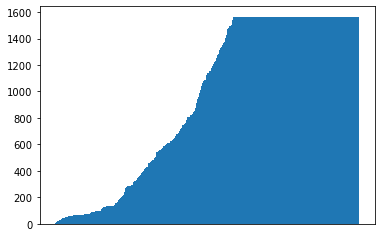

In [39]:
plt.bar(return_df_pivot.columns,return_count,width=1)
plt.xticks([])
plt.show()

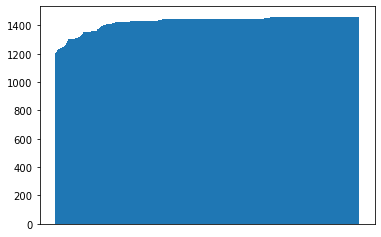

In [40]:
plt.bar(nav_df_pivot_drop_1200.columns,nav_count_1200,width=1)
plt.xticks([])
plt.show()

In [41]:
xs = return_df_pivot.loc["2018-12-31"]
ys = sd_df_pivot.loc["2018-12-31"]

In [42]:
nav_df_pivot_drop_1200.shape

(1467, 493)

In [43]:
return_df_pivot.shape

(1565, 953)

In [44]:
left_return_df = pd.DataFrame()

Drop Column(Fund Name) that return , sd and nav intersection 

In [45]:
left_return_df = pd.Series(list(set(nav_df_pivot_drop_1200).intersection(set(return_df_pivot))))

In [46]:
left_return_df.sort_values

<bound method Series.sort_values of 0              KT-BOND
1               MA-LTF
2                 KACB
3                 RMF1
4       T-GLOBALENERGY
5                  TEF
6                 RMF3
7                TMBTM
8             BSIRIRMF
9             FLEX-RMF
10            ABSC-RMF
11            SPOT33S7
12     T-PREMIUM BRAND
13         VALUE-D LTF
14            TISCOOIL
15           TISCOFLEX
16         T-PRIVILEGE
17       T-GLOBALEQRMF
18            KFFLEX-D
19              TCMCSF
20             KFFIN-D
21           TCMFENJOY
22              THDRMF
23             K-PLAN3
24                ABEG
25               ONE+1
26               CHINA
27            KTSIV6M2
28              SCBRM4
29              KFSMUL
30              KT-OIL
31                 BKA
32        TMBTHANAPLUS
33              KPLUS2
34               TMBMF
35          ABAPAC-RMF
36            KTSIV6M6
37          KFLTGOVRMF
38             TISCOAP
39             T-NGRMF
40             SCB2586
41             K-CBON

In [47]:
left_return_df

0              KT-BOND
1               MA-LTF
2                 KACB
3                 RMF1
4       T-GLOBALENERGY
5                  TEF
6                 RMF3
7                TMBTM
8             BSIRIRMF
9             FLEX-RMF
10            ABSC-RMF
11            SPOT33S7
12     T-PREMIUM BRAND
13         VALUE-D LTF
14            TISCOOIL
15           TISCOFLEX
16         T-PRIVILEGE
17       T-GLOBALEQRMF
18            KFFLEX-D
19              TCMCSF
20             KFFIN-D
21           TCMFENJOY
22              THDRMF
23             K-PLAN3
24                ABEG
25               ONE+1
26               CHINA
27            KTSIV6M2
28              SCBRM4
29              KFSMUL
30              KT-OIL
31                 BKA
32        TMBTHANAPLUS
33              KPLUS2
34               TMBMF
35          ABAPAC-RMF
36            KTSIV6M6
37          KFLTGOVRMF
38             TISCOAP
39             T-NGRMF
40             SCB2586
41             K-CBOND
42               KFSEQ
43         

In [48]:
return_droping_df = pd.DataFrame(columns=left_return_df)
sd_droping_df = pd.DataFrame(columns=left_return_df)

In [49]:
for fund_col in left_return_df :
    return_droping_df[fund_col] = return_df_pivot[fund_col]
    sd_droping_df[fund_col] = sd_df_pivot[fund_col]

In [50]:
return_droping_df

KT-BOND     MA-LTF      KACB       RMF1  T-GLOBALENERGY  \
date                                                                    
2013-01-01  15.104027  41.899844  3.939996  32.192753       -2.091509   
2013-01-02  15.204033  43.945643  3.952260  33.936776       -2.227711   
2013-01-03  16.205126  43.486438  3.969890  33.654772       -3.086477   
2013-01-04  16.360262  43.248311  3.917257  33.403055       -0.755932   
2013-01-07  16.006375  43.436662  3.885056  33.574567       -0.786861   
...               ...        ...       ...        ...             ...   
2018-12-25  -1.081917  -8.920300  1.548031  -7.636250      -16.732840   
2018-12-26  -0.973219  -9.233514  1.571900  -7.757140      -17.313856   
2018-12-27  -1.052942  -9.606429  1.563382  -8.099822      -17.313856   
2018-12-28  -1.204733  -8.099566  1.533690  -6.640570      -18.715076   
2018-12-31  -1.061700  -8.761781  1.526606  -7.069789      -18.715076   

                  TEF      RMF3     TMBTM   BSIRIRMF   FLEX-RMF  ...  \
date                                                             ...   
2013-01-01  49.274452  2.291120  2.733569        NaN  22.553113  ...   
2013-01-02  52.177213  2.201560  2.768078        NaN  23.762877  ...   
2013-01-03  50.411358  2.235756  2.774651        NaN  23.762877  ...   
2013-01-04  51.453390  2.145584  2.740682        NaN  23.593185  ...   
2013-01-07  51.190964  2.137388  2.745182        NaN  22.906373  ...   
...               ...       ...       ...        ...        ...  ...   
2018-12-25 -10.775071  0.160481  0.950497  -9.947699  -9.196386  ...   
2018-12-26 -10.953119  0.159742  0.950476 -10.020882  -9.006749  ...   
2018-12-27 -11.671395  0.151055  0.953418 -10.215021  -9.336837  ...   
2018-12-28  -9.843144  0.145982  0.954871  -8.874817  -7.964677  ...   
2018-12-31 -10.507720  0.126445  0.952628  -9.379215  -8.408117  ...   

                M-CR      K-FEQ  TFIX-3M#2       JB25     KEQRMF  \
date                                                               
2013-01-01  2.331931  32.991050   2.979329  32.583562  34.606048   
2013-01-02  2.331931  34.396987   2.979329  33.782496  36.155363   
2013-01-03  2.331931  34.161261   2.979329  33.490841  35.970379   
2013-01-04  2.406157  34.343014   2.979329  32.500798  36.129200   
2013-01-07  2.346468  33.821329   2.979329  31.967842  36.109373   
...              ...        ...        ...        ...        ...   
2018-12-25       NaN -13.059627   1.125540  -4.967893  -8.429475   
2018-12-26       NaN -13.195310   1.125540  -4.769113  -8.583014   
2018-12-27       NaN -13.685702   1.125540  -5.409759  -9.217380   
2018-12-28       NaN -12.638609   1.209743  -3.592166  -7.501102   
2018-12-31       NaN -12.982326   1.209743  -4.148719  -7.930259   

            KT-HIDIV RMF       I-15  SPOT33S14    T-CASH  KFGOLDRMF  
date                                                                 
2013-01-01           NaN   8.432428        NaN  2.762492  -6.617399  
2013-01-02           NaN   9.725922        NaN  2.798159  -6.343000  
2013-01-03           NaN  11.068849        NaN  2.805802  -6.289367  
2013-01-04           NaN   9.606403        NaN  2.773298  -2.265699  
2013-01-07           NaN  11.682804        NaN  2.776198  -3.224352  
...                  ...        ...        ...       ...        ...  
2018-12-25     -9.240633 -14.041117 -11.416001  1.047954  -8.361920  
2018-12-26     -9.390303 -14.041117 -11.047322  1.047148  -8.406664  
2018-12-27     -9.957985 -13.866150 -11.161422  1.046342  -9.269027  
2018-12-28     -8.377547 -13.461478  -9.298573  1.048601  -8.857715  
2018-12-31     -8.995953 -13.680010  -9.976762  1.048601  -8.880739  

[1565 rows x 493 columns]

In [51]:
sd_droping_df

KT-BOND     MA-LTF      KACB       RMF1  T-GLOBALENERGY  \
date                                                                   
2013-01-01  6.058418  13.107073  0.310403  13.377813       14.989100   
2013-01-02  6.046057  13.145353  0.309785  13.405363       14.958974   
2013-01-03  6.088738  13.127120  0.309137  13.382213       14.954367   
2013-01-04  6.088629  13.118665  0.307312  13.372497       15.331347   
2013-01-07  6.082253  13.139241  0.307580  13.397123       15.303662   
...              ...        ...       ...        ...             ...   
2018-12-25  1.704217  10.612356  0.332827  10.124149       14.739540   
2018-12-26  1.700032  10.603891  0.334372  10.122228       14.718742   
2018-12-27  1.698182  10.588786  0.334204  10.126341       14.718742   
2018-12-28  1.689860  10.623836  0.333115  10.155075       14.809664   
2018-12-31  1.687373  10.617711  0.333805  10.163855       14.809664   

                  TEF      RMF3     TMBTM  BSIRIRMF   FLEX-RMF  ...      M-CR  \
date                                                            ...             
2013-01-01  14.324404  0.781672  0.109365       NaN   8.305819  ...  0.310169   
2013-01-02  14.406590  0.786185  0.111477       NaN   8.338618  ...  0.309681   
2013-01-03  14.439776  0.784968  0.111359       NaN   8.338618  ...  0.309196   
2013-01-04  14.490211  0.787770  0.107461       NaN   8.332749  ...  0.315524   
2013-01-07  14.516357  0.789548  0.107942       NaN   8.359037  ...  0.312301   
...               ...       ...       ...       ...        ...  ...       ...   
2018-12-25  11.798980  0.414713  0.037498  8.715591  11.003440  ...       NaN   
2018-12-26  11.794548  0.414696  0.037499  8.714632  11.007462  ...       NaN   
2018-12-27  11.808371  0.414617  0.037483  8.722414  11.011582  ...       NaN   
2018-12-28  11.870257  0.414539  0.037475  8.762780  11.050881  ...       NaN   
2018-12-31  11.868054  0.414946  0.037513  8.760049  11.061183  ...       NaN   

                K-FEQ  TFIX-3M#2       JB25     KEQRMF  KT-HIDIV RMF  \
date                                                                   
2013-01-01  12.713924   0.741351  14.872670  13.983588           NaN   
2013-01-02  12.723053   0.739931  14.863064  13.993238           NaN   
2013-01-03  12.699749   0.738519  14.836409  13.967424           NaN   
2013-01-04  12.706256   0.738519  14.798849  13.973743           NaN   
2013-01-07  12.734268   0.739931  14.833005  14.000825           NaN   
...               ...        ...        ...        ...           ...   
2018-12-25  12.042251   0.282582  13.343855  12.055708     11.662849   
2018-12-26  12.038372   0.282582  13.346589  12.051726     11.660554   
2018-12-27  12.045710   0.282582  13.359739  12.060421     11.668312   
2018-12-28  12.096697   0.293541  13.388509  12.109409     11.700782   
2018-12-31  12.113265   0.293541  13.402527  12.123968     11.702438   

                 I-15  SPOT33S14    T-CASH  KFGOLDRMF  
date                                                   
2013-01-01  12.238549        NaN  0.111926  13.355092  
2013-01-02  12.272120        NaN  0.114190  13.331484  
2013-01-03  12.308044        NaN  0.114024  13.304386  
2013-01-04  12.182707        NaN  0.110570  11.998257  
2013-01-07  12.211193        NaN  0.111159  11.969021  
...               ...        ...       ...        ...  
2018-12-25  13.056882   8.431929  0.051937   8.404355  
2018-12-26  13.056882   8.435292  0.051939   8.399476  
2018-12-27  13.030319   8.418321  0.051941   8.356189  
2018-12-28  13.041120   8.440251  0.051868   8.365567  
2018-12-31  13.066494   8.419109  0.051868   8.383166  

[1565 rows x 493 columns]

In [52]:
xs = return_droping_df.loc["2018-12-31"].dropna()
ys = sd_droping_df.loc["2018-12-31"].dropna()

In [53]:
xs

KT-BOND            -1.061700
MA-LTF             -8.761781
KACB                1.526606
RMF1               -7.069789
T-GLOBALENERGY    -18.715076
TEF               -10.507720
RMF3                0.126445
TMBTM               0.952628
BSIRIRMF           -9.379215
FLEX-RMF           -8.408117
ABSC-RMF           -6.962290
SPOT33S7           -9.402836
T-PREMIUM BRAND   -20.613422
VALUE-D LTF       -15.316414
TISCOOIL          -17.264980
TISCOFLEX          -7.277665
T-PRIVILEGE       -29.211775
T-GLOBALEQRMF      -8.338742
KFFLEX-D          -28.648612
TCMCSF            -10.655757
KFFIN-D           -22.809927
TCMFENJOY           1.278659
THDRMF            -10.361631
K-PLAN3            -6.282300
ABEG              -13.542521
ONE+1             -32.906657
CHINA             -28.276652
KTSIV6M2            1.082860
SCBRM4            -13.652286
KFSMUL              1.099312
KT-OIL            -17.014346
BKA               -10.198548
TMBTHANAPLUS        1.210249
KPLUS2            -13.882723
TMBMF         

In [54]:
ys

KT-BOND             1.687373
MA-LTF             10.617711
KACB                0.333805
RMF1               10.163855
T-GLOBALENERGY     14.809664
TEF                11.868054
RMF3                0.414946
TMBTM               0.037513
BSIRIRMF            8.760049
FLEX-RMF           11.061183
ABSC-RMF           10.713625
SPOT33S7            9.237699
T-PREMIUM BRAND    15.572380
VALUE-D LTF        11.529453
TISCOOIL           26.182206
TISCOFLEX          12.203019
T-PRIVILEGE        15.711729
T-GLOBALEQRMF      12.622361
KFFLEX-D           19.951079
TCMCSF             12.701696
KFFIN-D            18.156985
TCMFENJOY           0.057458
THDRMF             11.805900
K-PLAN3             6.414871
ABEG               14.328021
ONE+1              14.210692
CHINA              29.338390
KTSIV6M2            0.303140
SCBRM4             13.225883
KFSMUL              0.425868
KT-OIL             26.313740
BKA                10.550355
TMBTHANAPLUS        0.069106
KPLUS2             13.292995
TMBMF         

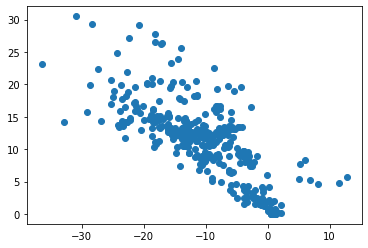

In [55]:
plt.scatter(xs,ys)
plt.show()

In [56]:
def elbow_point(curve):
	n_points = len(curve)
	all_coord = np.vstack((range(n_points), curve)).T
	np.array([range(n_points), curve])
	first_point = all_coord[0]
	line_vec = all_coord[-1] - first_point
	line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
	vec_from_first = all_coord - first_point
	scalar_product = np.sum(vec_from_first * np.matlib.repmat(line_vec_norm, n_points, 1), axis=1)
	vec_from_first_parallel = np.outer(scalar_product, line_vec_norm)
	vec_to_line = vec_from_first - vec_from_first_parallel
	dist_to_line = np.sqrt(np.sum(vec_to_line ** 2, axis=1))
	# print (dist_to_line)
	idx_best = np.argmax(dist_to_line)
	return idx_best

In [57]:
X = np.array(list(zip(xs.tolist(),ys.tolist())))
X

array([[-1.06170015e+00,  1.68737322e+00],
       [-8.76178118e+00,  1.06177113e+01],
       [ 1.52660620e+00,  3.33805105e-01],
       [-7.06978928e+00,  1.01638549e+01],
       [-1.87150759e+01,  1.48096645e+01],
       [-1.05077197e+01,  1.18680545e+01],
       [ 1.26445087e-01,  4.14945834e-01],
       [ 9.52627875e-01,  3.75131766e-02],
       [-9.37921491e+00,  8.76004908e+00],
       [-8.40811693e+00,  1.10611832e+01],
       [-6.96229013e+00,  1.07136253e+01],
       [-9.40283621e+00,  9.23769869e+00],
       [-2.06134225e+01,  1.55723798e+01],
       [-1.53164143e+01,  1.15294527e+01],
       [-1.72649804e+01,  2.61822060e+01],
       [-7.27766496e+00,  1.22030191e+01],
       [-2.92117745e+01,  1.57117288e+01],
       [-8.33874244e+00,  1.26223612e+01],
       [-2.86486117e+01,  1.99510794e+01],
       [-1.06557571e+01,  1.27016956e+01],
       [-2.28099272e+01,  1.81569855e+01],
       [ 1.27865922e+00,  5.74577496e-02],
       [-1.03616308e+01,  1.18059003e+01],
       [-6.

In [58]:
#Elbow Method
distortions =[]
inertias = []
mapping1 = {} #euclidean
mapping2 = {} #inertias
K = range(1,20)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis = 1 )) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

#     mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
#                  'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

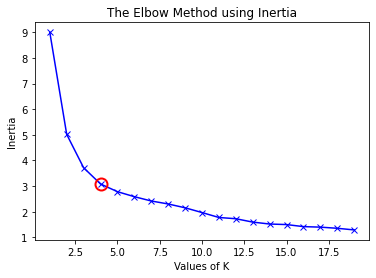

In [59]:
elbow_point(distortions)
plt.plot(K, distortions, 'bx-') 
plt.plot(K[elbow_point(distortions)], distortions[elbow_point(distortions)], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.xlabel('Values of K')
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

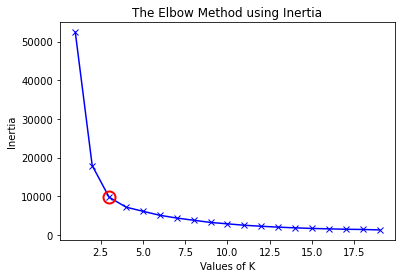

In [60]:
elbow_point(inertias)
plt.plot(K, inertias, 'bx-') 
plt.plot(K[elbow_point(inertias)], inertias[elbow_point(inertias)], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.xlabel('Values of K')
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [61]:
elbow_point(inertias)

2

In [62]:
elbow_point(distortions)

3

In [63]:
kmean_Cluster_iner = KMeans(n_clusters=elbow_point(inertias))
kmean_Cluster_iner = kmean_Cluster_iner.fit(X)
# kmean_4Cluster = kmean_4Cluster+1
kmean_Cluster_iner

KMeans(n_clusters=2)

In [64]:
kmean_Cluster_iner.cluster_centers_

array([[ -0.57313623,   2.65071171],
       [-13.65627912,  13.93928251]])

In [65]:
color = kmean_Cluster_iner.labels_
color

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

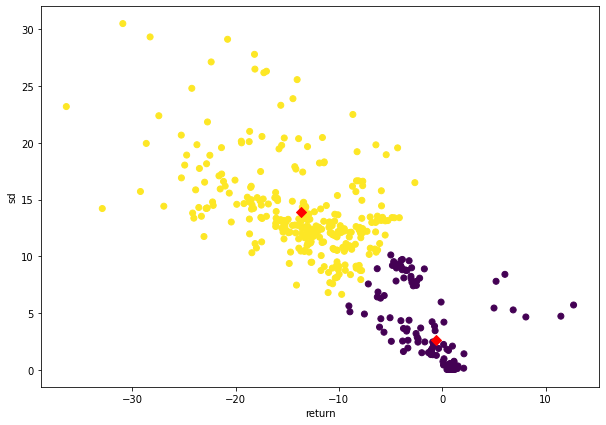

In [66]:
plt.figure(figsize=(10,7))
plt.xlabel('return')
plt.ylabel('sd')
plt.scatter(X[:,0],X[:,1] , cmap="viridis",c= color)
plt.scatter(kmean_Cluster_iner.cluster_centers_[:,0] ,kmean_Cluster_iner.cluster_centers_[:,1],color='red',marker = 'D', s=50)

In [67]:
sharpe_df = return_droping_df / sd_droping_df

In [68]:
sharpe_df

KT-BOND    MA-LTF       KACB      RMF1  T-GLOBALENERGY       TEF  \
date                                                                            
2013-01-01  2.493065  3.196735  12.693155  2.406429       -0.139535  3.439896   
2013-01-02  2.514702  3.343055  12.758087  2.531582       -0.148921  3.621760   
2013-01-03  2.661492  3.312717  12.841862  2.514888       -0.206393  3.491145   
2013-01-04  2.687019  3.296701  12.746825  2.497892       -0.049306  3.550907   
2013-01-07  2.631652  3.305873  12.631029  2.506103       -0.051417  3.526433   
...              ...       ...        ...       ...             ...       ...   
2018-12-25 -0.634847 -0.840558   4.651152 -0.754261       -1.135235 -0.913221   
2018-12-26 -0.572471 -0.870767   4.701045 -0.766347       -1.176314 -0.928659   
2018-12-27 -0.620041 -0.907227   4.677933 -0.799877       -1.176314 -0.988400   
2018-12-28 -0.712919 -0.762396   4.604079 -0.653916       -1.263707 -0.829228   
2018-12-31 -0.629203 -0.825204   4.573346 -0.695581       -1.263707 -0.885378   

                RMF3      TMBTM  BSIRIRMF  FLEX-RMF  ...      M-CR     K-FEQ  \
date                                                 ...                       
2013-01-01  2.931050  24.994910       NaN  2.715339  ...  7.518254  2.594875   
2013-01-02  2.800309  24.830831       NaN  2.849738  ...  7.530098  2.703517   
2013-01-03  2.848213  24.916174       NaN  2.849738  ...  7.541931  2.689916   
2013-01-04  2.723618  25.503873       NaN  2.831381  ...  7.625906  2.702843   
2013-01-07  2.707103  25.432050       NaN  2.740313  ...  7.513473  2.655930   
...              ...        ...       ...       ...  ...       ...       ...   
2018-12-25  0.386969  25.347862 -1.141368 -0.835774  ...       NaN -1.084484   
2018-12-26  0.385203  25.346655 -1.149892 -0.818240  ...       NaN -1.096104   
2018-12-27  0.364325  25.436101 -1.171123 -0.847911  ...       NaN -1.136147   
2018-12-28  0.352156  25.480464 -1.012786 -0.720728  ...       NaN -1.044798   
2018-12-31  0.304727  25.394487 -1.070681 -0.760146  ...       NaN -1.071745   

            TFIX-3M#2      JB25    KEQRMF  KT-HIDIV RMF      I-15  SPOT33S14  \
date                                                                           
2013-01-01   4.018786  2.190835  2.474762           NaN  0.689006        NaN   
2013-01-02   4.026498  2.272916  2.583774           NaN  0.792522        NaN   
2013-01-03   4.034195  2.257341  2.575305           NaN  0.899318        NaN   
2013-01-04   4.034195  2.196171  2.585506           NaN  0.788528        NaN   
2013-01-07   4.026498  2.155183  2.579089           NaN  0.956729        NaN   
...               ...       ...       ...           ...       ...        ...   
2018-12-25   3.983061 -0.372298 -0.699210     -0.792314 -1.075381  -1.353901   
2018-12-26   3.983061 -0.357328 -0.712181     -0.805305 -1.075381  -1.309655   
2018-12-27   3.983061 -0.404930 -0.764267     -0.853421 -1.064145  -1.325849   
2018-12-28   4.121201 -0.268302 -0.619444     -0.715982 -1.032233  -1.101694   
2018-12-31   4.121201 -0.309548 -0.654098     -0.768725 -1.046953  -1.185014   

               T-CASH  KFGOLDRMF  
date                              
2013-01-01  24.681309  -0.495496  
2013-01-02  24.504392  -0.475791  
2013-01-03  24.607160  -0.472729  
2013-01-04  25.081901  -0.188836  
2013-01-07  24.975044  -0.269391  
...               ...        ...  
2018-12-25  20.177470  -0.994951  
2018-12-26  20.161108  -1.000856  
2018-12-27  20.144768  -1.109241  
2018-12-28  20.216782  -1.058830  
2018-12-31  20.216782  -1.059354  

[1565 rows x 493 columns]

In [69]:
return_cluster_df = pd.DataFrame(return_droping_df.loc["2018-12-31"].dropna())
sd_cluster_df = pd.DataFrame(sd_droping_df.loc["2018-12-31"].dropna())
sharp_cluster_df = pd.DataFrame(sharpe_df.loc["2018-12-31"].dropna())

In [70]:
return_cluster_df

2018-12-31
KT-BOND           -1.061700
MA-LTF            -8.761781
KACB               1.526606
RMF1              -7.069789
T-GLOBALENERGY   -18.715076
TEF              -10.507720
RMF3               0.126445
TMBTM              0.952628
BSIRIRMF          -9.379215
FLEX-RMF          -8.408117
ABSC-RMF          -6.962290
SPOT33S7          -9.402836
T-PREMIUM BRAND  -20.613422
VALUE-D LTF      -15.316414
TISCOOIL         -17.264980
TISCOFLEX         -7.277665
T-PRIVILEGE      -29.211775
T-GLOBALEQRMF     -8.338742
KFFLEX-D         -28.648612
TCMCSF           -10.655757
KFFIN-D          -22.809927
TCMFENJOY          1.278659
THDRMF           -10.361631
K-PLAN3           -6.282300
ABEG             -13.542521
ONE+1            -32.906657
CHINA            -28.276652
KTSIV6M2           1.082860
SCBRM4           -13.652286
KFSMUL             1.099312
KT-OIL           -17.014346
BKA              -10.198548
TMBTHANAPLUS       1.210249
KPLUS2           -13.882723
TMBMF              0.894561
ABAPAC-RMF       -13.205446
KTSIV6M6           0.813083
KFLTGOVRMF         1.147215
TISCOAP          -18.487260
T-NGRMF            0.864873
SCB2586          -11.870206
K-CBOND            1.129728
KFSEQ            -22.855246
ONE-UB 3         -17.906604
TGOLDRMF          -3.874998
EFOOD            -24.042031
KSET50LTF         -6.450687
GLD               -2.183527
HI-DIV            -9.390516
1S-LTF           -10.085079
KFMTFI             1.063844
SCBGOLDHRMF       -4.540888
KT-GOLD RMF       -3.926220
B-SENIOR          -1.685453
KFLTFD70         -10.228734
KT-PROPERTY RMF   -6.395228
K20SLTF          -17.557426
TMBMRMF            0.677032
TMBBFRMF           1.124665
ONE-FAR            1.165292
SCBLT4           -18.257495
CPRMF2            -1.065929
SSB               -8.775089
T-LOWBETA         -8.034208
MIF-LTF          -10.797858
SVRMF              1.050067
K-FIXED            1.161795
HAPPY D5         -12.739175
KF-OIL           -22.365180
KF-TRB            -3.310550
M-BOND             0.656217
TMBCHEQ          -24.239022
B-ACTIVE          -5.612298
TISCOCH          -13.902767
KFMTFIRMF          0.942004
1US-OPP           -8.240173
K-2520            -3.998057
KF-GBLVAL        -13.894577
KT-MINING        -18.684549
RMF2               0.251855
M-FIX              0.814844
SF4              -12.687586
KSDLTF             0.166811
GBRMF              0.691557
SPOT33S9          -7.881701
ONE-G            -12.890473
K-INDIA          -17.581216
KFTSRMF          -15.082261
K-SF               1.024622
MM-GOV             0.891082
T-TSB              1.218897
ABJO             -21.490780
K-SET50           -5.690505
I-REITS          -14.508220
TFIX-3M#3          1.212984
KFENSET50         -5.922905
KFFLEX2RMF       -14.880030
SF5               -8.982844
KT-AGRI          -22.231046
I-GOLD7S2         -4.692842
KTSIV3M1           1.063247
TMBAAMF           -0.979190
SCBAEM           -22.493184
KTPLUS             1.038097
TDEX              -7.779515
I-GOLD7S3         -4.372217
UOBLTF            -7.879813
KTLF              -9.475100
BIG CAP-D LTF    -11.936861
TBF              -13.983948
SCB2576           -6.215553
1AM-GEM          -25.244591
MFX              -10.605745
I-CHIC            -9.809190
SCBLTS            -3.208656
KF-US            -14.270427
KPLUS            -13.594456
1AM-DAILY          0.964232
SYRUS-M          -23.503263
RMF4               0.778108
KTSIV6M3           1.112454
T-NMIXRMF         -9.881523
T-PPSD           -15.320901
UOBSD              0.863302
K-2500            -0.966557
TGOV3M1            1.072847
TISCOJP          -11.442805
KT-PRECIOUS      -19.448548
SCIF             -27.431296
TMBAALF           -3.024105
BFIXED             1.036685
TFIXLT            -0.348204
KFMXPLS2TM        -2.349776
AGF              -22.999523
TISCOLAF         -14.043047
KTSF             -15.635724
KFLRMF            -9.316927
KGLTF            -12.810672
ONE-FLEX         -17.509452
UOBSVRMF           0.924083
KT-HIDIV         -11.674196
FCF               -8.932487
UOBSAS100D   

In [71]:
sd_cluster_df

2018-12-31
KT-BOND            1.687373
MA-LTF            10.617711
KACB               0.333805
RMF1              10.163855
T-GLOBALENERGY    14.809664
TEF               11.868054
RMF3               0.414946
TMBTM              0.037513
BSIRIRMF           8.760049
FLEX-RMF          11.061183
ABSC-RMF          10.713625
SPOT33S7           9.237699
T-PREMIUM BRAND   15.572380
VALUE-D LTF       11.529453
TISCOOIL          26.182206
TISCOFLEX         12.203019
T-PRIVILEGE       15.711729
T-GLOBALEQRMF     12.622361
KFFLEX-D          19.951079
TCMCSF            12.701696
KFFIN-D           18.156985
TCMFENJOY          0.057458
THDRMF            11.805900
K-PLAN3            6.414871
ABEG              14.328021
ONE+1             14.210692
CHINA             29.338390
KTSIV6M2           0.303140
SCBRM4            13.225883
KFSMUL             0.425868
KT-OIL            26.313740
BKA               10.550355
TMBTHANAPLUS       0.069106
KPLUS2            13.292995
TMBMF              0.036869
ABAPAC-RMF        14.344580
KTSIV6M6           0.315632
KFLTGOVRMF         0.747276
TISCOAP           16.176099
T-NGRMF            0.153262
SCB2586           11.680190
K-CBOND            0.352781
KFSEQ             14.216527
ONE-UB 3          15.171868
TGOLDRMF           8.813597
EFOOD             13.361759
KSET50LTF         12.983575
GLD                8.073380
HI-DIV            10.627109
1S-LTF            12.180052
KFMTFI             0.308055
SCBGOLDHRMF        9.229718
KT-GOLD RMF        9.010003
B-SENIOR           2.451417
KFLTFD70           9.185965
KT-PROPERTY RMF   10.363099
K20SLTF           13.430182
TMBMRMF            0.028067
TMBBFRMF           0.664941
ONE-FAR            0.147672
SCBLT4            14.219436
CPRMF2             1.672343
SSB               10.803757
T-LOWBETA          9.195854
MIF-LTF           12.109740
SVRMF              0.059928
K-FIXED            0.388971
HAPPY D5          11.179582
KF-OIL            27.133009
KF-TRB             2.597468
M-BOND             0.222296
TMBCHEQ           24.808521
B-ACTIVE           6.539082
TISCOCH           20.371786
KFMTFIRMF          0.358768
1US-OPP           19.219728
K-2520             4.322999
KF-GBLVAL         11.536316
KT-MINING         20.107629
RMF2               0.426845
M-FIX              0.213572
SF4               11.283695
KSDLTF             4.195761
GBRMF              0.368815
SPOT33S9           7.945535
ONE-G             13.732352
K-INDIA           17.474138
KFTSRMF           12.278808
K-SF               0.105520
MM-GOV             0.041933
T-TSB              0.130105
ABJO              15.934330
K-SET50           13.251374
I-REITS           14.853878
TFIX-3M#3          0.291433
KFENSET50         13.303087
KFFLEX2RMF        12.078676
SF5               10.931002
KT-AGRI           14.790148
I-GOLD7S2          9.528976
KTSIV3M1           0.268701
TMBAAMF            4.225556
SCBAEM            18.904889
KTPLUS             0.089535
TDEX              13.348891
I-GOLD7S3          9.298530
UOBLTF            11.636209
KTLF              12.430149
BIG CAP-D LTF     12.558873
TBF               12.728277
SCB2576            6.851304
1AM-GEM           16.911208
MFX                7.578912
I-CHIC            12.437867
SCBLTS             4.364143
KF-US             17.900411
KPLUS             13.240916
1AM-DAILY          0.043846
SYRUS-M           17.742985
RMF4               0.043325
KTSIV6M3           0.319085
T-NMIXRMF         12.183625
T-PPSD            13.154292
UOBSD              0.035515
K-2500             1.884432
TGOV3M1            0.263370
TISCOJP           18.240837
KT-PRECIOUS       20.146832
SCIF              22.391042
TMBAALF            8.231094
BFIXED             0.335107
TFIXLT             1.874738
KFMXPLS2TM         2.434372
AGF               16.532309
TISCOLAF          25.574408
KTSF              13.228717
KFLRMF            11.121346
KGLTF             13.262668
ONE-FLEX          14.511501
UOBSVRMF           0.088504
KT-HIDIV          12.390400
FCF                5.107428
UOBSAS100D   

In [72]:
sharp_cluster_df

2018-12-31
KT-BOND           -0.629203
MA-LTF            -0.825204
KACB               4.573346
RMF1              -0.695581
T-GLOBALENERGY    -1.263707
TEF               -0.885378
RMF3               0.304727
TMBTM             25.394487
BSIRIRMF          -1.070681
FLEX-RMF          -0.760146
ABSC-RMF          -0.649854
SPOT33S7          -1.017876
T-PREMIUM BRAND   -1.323717
VALUE-D LTF       -1.328460
TISCOOIL          -0.659417
TISCOFLEX         -0.596382
T-PRIVILEGE       -1.859234
T-GLOBALEQRMF     -0.660633
KFFLEX-D          -1.435943
TCMCSF            -0.838924
KFFIN-D           -1.256262
TCMFENJOY         22.253904
THDRMF            -0.877665
K-PLAN3           -0.979334
ABEG              -0.945177
ONE+1             -2.315627
CHINA             -0.963811
KTSIV6M2           3.572146
SCBRM4            -1.032240
KFSMUL             2.581343
KT-OIL            -0.646596
BKA               -0.966655
TMBTHANAPLUS      17.512959
KPLUS2            -1.044364
TMBMF             24.263214
ABAPAC-RMF        -0.920588
KTSIV6M6           2.576044
KFLTGOVRMF         1.535196
TISCOAP           -1.142875
T-NGRMF            5.643102
SCB2586           -1.016268
K-CBOND            3.202354
KFSEQ             -1.607653
ONE-UB 3          -1.180250
TGOLDRMF          -0.439661
EFOOD             -1.799316
KSET50LTF         -0.496834
GLD               -0.270460
HI-DIV            -0.883638
1S-LTF            -0.828000
KFMTFI             3.453423
SCBGOLDHRMF       -0.491986
KT-GOLD RMF       -0.435762
B-SENIOR          -0.687542
KFLTFD70          -1.113518
KT-PROPERTY RMF   -0.617115
K20SLTF           -1.307311
TMBMRMF           24.121811
TMBBFRMF           1.691375
ONE-FAR            7.891106
SCBLT4            -1.283982
CPRMF2            -0.637387
SSB               -0.812226
T-LOWBETA         -0.873677
MIF-LTF           -0.891667
SVRMF             17.522249
K-FIXED            2.986842
HAPPY D5          -1.139504
KF-OIL            -0.824279
KF-TRB            -1.274530
M-BOND             2.952001
TMBCHEQ           -0.977044
B-ACTIVE          -0.858270
TISCOCH           -0.682452
KFMTFIRMF          2.625662
1US-OPP           -0.428735
K-2520            -0.924834
KF-GBLVAL         -1.204421
KT-MINING         -0.929227
RMF2               0.590039
M-FIX              3.815306
SF4               -1.124418
KSDLTF             0.039757
GBRMF              1.875079
SPOT33S9          -0.991966
ONE-G             -0.938694
K-INDIA           -1.006128
KFTSRMF           -1.228316
K-SF               9.710205
MM-GOV            21.250195
T-TSB              9.368531
ABJO              -1.348709
K-SET50           -0.429428
I-REITS           -0.976729
TFIX-3M#3          4.162132
KFENSET50         -0.445228
KFFLEX2RMF        -1.231926
SF5               -0.821777
KT-AGRI           -1.503098
I-GOLD7S2         -0.492481
KTSIV3M1           3.956985
TMBAAMF           -0.231731
SCBAEM            -1.189808
KTPLUS            11.594359
TDEX              -0.582784
I-GOLD7S3         -0.470205
UOBLTF            -0.677180
KTLF              -0.762268
BIG CAP-D LTF     -0.950472
TBF               -1.098652
SCB2576           -0.907207
1AM-GEM           -1.492773
MFX               -1.399376
I-CHIC            -0.788655
SCBLTS            -0.735232
KF-US             -0.797212
KPLUS             -1.026701
1AM-DAILY         21.991511
SYRUS-M           -1.324651
RMF4              17.959624
KTSIV6M3           3.486383
T-NMIXRMF         -0.811049
T-PPSD            -1.164707
UOBSD             24.308444
K-2500            -0.512917
TGOV3M1            4.073534
TISCOJP           -0.627318
KT-PRECIOUS       -0.965340
SCIF              -1.225101
TMBAALF           -0.367400
BFIXED             3.093596
TFIXLT            -0.185735
KFMXPLS2TM        -0.965249
AGF               -1.391186
TISCOLAF          -0.549105
KTSF              -1.181953
KFLRMF            -0.837752
KGLTF             -0.965920
ONE-FLEX          -1.206591
UOBSVRMF          10.441112
KT-HIDIV          -0.942197
FCF               -1.748921
UOBSAS100D   

In [73]:
return_cluster_df = return_cluster_df.rename(columns={return_cluster_df.columns[0]: "return"})
sd_cluster_df = sd_cluster_df.rename(columns={sd_cluster_df.columns[0]: "sd"})
sharp_cluster_df = sharp_cluster_df.rename(columns={sharp_cluster_df.columns[0]: "sharp ratio"})

In [74]:
return_cluster_df["cluster"] = kmean_Cluster_iner.labels_
return_cluster_df

return  cluster
KT-BOND          -1.061700        0
MA-LTF           -8.761781        1
KACB              1.526606        0
RMF1             -7.069789        1
T-GLOBALENERGY  -18.715076        1
TEF             -10.507720        1
RMF3              0.126445        0
TMBTM             0.952628        0
BSIRIRMF         -9.379215        1
FLEX-RMF         -8.408117        1
ABSC-RMF         -6.962290        1
SPOT33S7         -9.402836        1
T-PREMIUM BRAND -20.613422        1
VALUE-D LTF     -15.316414        1
TISCOOIL        -17.264980        1
TISCOFLEX        -7.277665        1
T-PRIVILEGE     -29.211775        1
T-GLOBALEQRMF    -8.338742        1
KFFLEX-D        -28.648612        1
TCMCSF          -10.655757        1
KFFIN-D         -22.809927        1
TCMFENJOY         1.278659        0
THDRMF          -10.361631        1
K-PLAN3          -6.282300        0
ABEG            -13.542521        1
ONE+1           -32.906657        1
CHINA           -28.276652        1
KTSIV6M2          1.082860        0
SCBRM4          -13.652286        1
KFSMUL            1.099312        0
KT-OIL          -17.014346        1
BKA             -10.198548        1
TMBTHANAPLUS      1.210249        0
KPLUS2          -13.882723        1
TMBMF             0.894561        0
ABAPAC-RMF      -13.205446        1
KTSIV6M6          0.813083        0
KFLTGOVRMF        1.147215        0
TISCOAP         -18.487260        1
T-NGRMF           0.864873        0
SCB2586         -11.870206        1
K-CBOND           1.129728        0
KFSEQ           -22.855246        1
ONE-UB 3        -17.906604        1
TGOLDRMF         -3.874998        0
EFOOD           -24.042031        1
KSET50LTF        -6.450687        1
GLD              -2.183527        0
HI-DIV           -9.390516        1
1S-LTF          -10.085079        1
KFMTFI            1.063844        0
SCBGOLDHRMF      -4.540888        0
KT-GOLD RMF      -3.926220        0
B-SENIOR         -1.685453        0
KFLTFD70        -10.228734        1
KT-PROPERTY RMF  -6.395228        1
K20SLTF         -17.557426        1
TMBMRMF           0.677032        0
TMBBFRMF          1.124665        0
ONE-FAR           1.165292        0
SCBLT4          -18.257495        1
CPRMF2           -1.065929        0
SSB              -8.775089        1
T-LOWBETA        -8.034208        1
MIF-LTF         -10.797858        1
SVRMF             1.050067        0
K-FIXED           1.161795        0
HAPPY D5        -12.739175        1
KF-OIL          -22.365180        1
KF-TRB           -3.310550        0
M-BOND            0.656217        0
TMBCHEQ         -24.239022        1
B-ACTIVE         -5.612298        0
TISCOCH         -13.902767        1
KFMTFIRMF         0.942004        0
1US-OPP          -8.240173        1
K-2520           -3.998057        0
KF-GBLVAL       -13.894577        1
KT-MINING       -18.684549        1
RMF2              0.251855        0
M-FIX             0.814844        0
SF4             -12.687586        1
KSDLTF            0.166811        0
GBRMF             0.691557        0
SPOT33S9         -7.881701        1
ONE-G           -12.890473        1
K-INDIA         -17.581216        1
KFTSRMF         -15.082261        1
K-SF              1.024622        0
MM-GOV            0.891082        0
T-TSB             1.218897        0
ABJO            -21.490780        1
K-SET50          -5.690505        1
I-REITS         -14.508220        1
TFIX-3M#3         1.212984        0
KFENSET50        -5.922905        1
KFFLEX2RMF      -14.880030        1
SF5              -8.982844        1
KT-AGRI         -22.231046        1
I-GOLD7S2        -4.692842        0
KTSIV3M1          1.063247        0
TMBAAMF          -0.979190        0
SCBAEM          -22.493184        1
KTPLUS            1.038097        0
TDEX             -7.779515        1
I-GOLD7S3        -4.372217        0
UOBLTF           -7.879813        1
KTLF             -9.475100        1
BIG CAP-D LTF   -11.936861        1
TBF             -13.983948        1
SCB2576          -6.2155

In [75]:
sd_cluster_df["cluster"] = kmean_Cluster_iner.labels_
sd_cluster_df

sd  cluster
KT-BOND           1.687373        0
MA-LTF           10.617711        1
KACB              0.333805        0
RMF1             10.163855        1
T-GLOBALENERGY   14.809664        1
TEF              11.868054        1
RMF3              0.414946        0
TMBTM             0.037513        0
BSIRIRMF          8.760049        1
FLEX-RMF         11.061183        1
ABSC-RMF         10.713625        1
SPOT33S7          9.237699        1
T-PREMIUM BRAND  15.572380        1
VALUE-D LTF      11.529453        1
TISCOOIL         26.182206        1
TISCOFLEX        12.203019        1
T-PRIVILEGE      15.711729        1
T-GLOBALEQRMF    12.622361        1
KFFLEX-D         19.951079        1
TCMCSF           12.701696        1
KFFIN-D          18.156985        1
TCMFENJOY         0.057458        0
THDRMF           11.805900        1
K-PLAN3           6.414871        0
ABEG             14.328021        1
ONE+1            14.210692        1
CHINA            29.338390        1
KTSIV6M2          0.303140        0
SCBRM4           13.225883        1
KFSMUL            0.425868        0
KT-OIL           26.313740        1
BKA              10.550355        1
TMBTHANAPLUS      0.069106        0
KPLUS2           13.292995        1
TMBMF             0.036869        0
ABAPAC-RMF       14.344580        1
KTSIV6M6          0.315632        0
KFLTGOVRMF        0.747276        0
TISCOAP          16.176099        1
T-NGRMF           0.153262        0
SCB2586          11.680190        1
K-CBOND           0.352781        0
KFSEQ            14.216527        1
ONE-UB 3         15.171868        1
TGOLDRMF          8.813597        0
EFOOD            13.361759        1
KSET50LTF        12.983575        1
GLD               8.073380        0
HI-DIV           10.627109        1
1S-LTF           12.180052        1
KFMTFI            0.308055        0
SCBGOLDHRMF       9.229718        0
KT-GOLD RMF       9.010003        0
B-SENIOR          2.451417        0
KFLTFD70          9.185965        1
KT-PROPERTY RMF  10.363099        1
K20SLTF          13.430182        1
TMBMRMF           0.028067        0
TMBBFRMF          0.664941        0
ONE-FAR           0.147672        0
SCBLT4           14.219436        1
CPRMF2            1.672343        0
SSB              10.803757        1
T-LOWBETA         9.195854        1
MIF-LTF          12.109740        1
SVRMF             0.059928        0
K-FIXED           0.388971        0
HAPPY D5         11.179582        1
KF-OIL           27.133009        1
KF-TRB            2.597468        0
M-BOND            0.222296        0
TMBCHEQ          24.808521        1
B-ACTIVE          6.539082        0
TISCOCH          20.371786        1
KFMTFIRMF         0.358768        0
1US-OPP          19.219728        1
K-2520            4.322999        0
KF-GBLVAL        11.536316        1
KT-MINING        20.107629        1
RMF2              0.426845        0
M-FIX             0.213572        0
SF4              11.283695        1
KSDLTF            4.195761        0
GBRMF             0.368815        0
SPOT33S9          7.945535        1
ONE-G            13.732352        1
K-INDIA          17.474138        1
KFTSRMF          12.278808        1
K-SF              0.105520        0
MM-GOV            0.041933        0
T-TSB             0.130105        0
ABJO             15.934330        1
K-SET50          13.251374        1
I-REITS          14.853878        1
TFIX-3M#3         0.291433        0
KFENSET50        13.303087        1
KFFLEX2RMF       12.078676        1
SF5              10.931002        1
KT-AGRI          14.790148        1
I-GOLD7S2         9.528976        0
KTSIV3M1          0.268701        0
TMBAAMF           4.225556        0
SCBAEM           18.904889        1
KTPLUS            0.089535        0
TDEX             13.348891        1
I-GOLD7S3         9.298530        0
UOBLTF           11.636209        1
KTLF             12.430149        1
BIG CAP-D LTF    12.558873        1
TBF              12.728277        1
SCB2576           6.851304  

In [76]:
sharp_cluster_df["cluster"] = kmean_Cluster_iner.labels_
sharp_cluster_df

sharp ratio  cluster
KT-BOND            -0.629203        0
MA-LTF             -0.825204        1
KACB                4.573346        0
RMF1               -0.695581        1
T-GLOBALENERGY     -1.263707        1
TEF                -0.885378        1
RMF3                0.304727        0
TMBTM              25.394487        0
BSIRIRMF           -1.070681        1
FLEX-RMF           -0.760146        1
ABSC-RMF           -0.649854        1
SPOT33S7           -1.017876        1
T-PREMIUM BRAND    -1.323717        1
VALUE-D LTF        -1.328460        1
TISCOOIL           -0.659417        1
TISCOFLEX          -0.596382        1
T-PRIVILEGE        -1.859234        1
T-GLOBALEQRMF      -0.660633        1
KFFLEX-D           -1.435943        1
TCMCSF             -0.838924        1
KFFIN-D            -1.256262        1
TCMFENJOY          22.253904        0
THDRMF             -0.877665        1
K-PLAN3            -0.979334        0
ABEG               -0.945177        1
ONE+1              -2.315627        1
CHINA              -0.963811        1
KTSIV6M2            3.572146        0
SCBRM4             -1.032240        1
KFSMUL              2.581343        0
KT-OIL             -0.646596        1
BKA                -0.966655        1
TMBTHANAPLUS       17.512959        0
KPLUS2             -1.044364        1
TMBMF              24.263214        0
ABAPAC-RMF         -0.920588        1
KTSIV6M6            2.576044        0
KFLTGOVRMF          1.535196        0
TISCOAP            -1.142875        1
T-NGRMF             5.643102        0
SCB2586            -1.016268        1
K-CBOND             3.202354        0
KFSEQ              -1.607653        1
ONE-UB 3           -1.180250        1
TGOLDRMF           -0.439661        0
EFOOD              -1.799316        1
KSET50LTF          -0.496834        1
GLD                -0.270460        0
HI-DIV             -0.883638        1
1S-LTF             -0.828000        1
KFMTFI              3.453423        0
SCBGOLDHRMF        -0.491986        0
KT-GOLD RMF        -0.435762        0
B-SENIOR           -0.687542        0
KFLTFD70           -1.113518        1
KT-PROPERTY RMF    -0.617115        1
K20SLTF            -1.307311        1
TMBMRMF            24.121811        0
TMBBFRMF            1.691375        0
ONE-FAR             7.891106        0
SCBLT4             -1.283982        1
CPRMF2             -0.637387        0
SSB                -0.812226        1
T-LOWBETA          -0.873677        1
MIF-LTF            -0.891667        1
SVRMF              17.522249        0
K-FIXED             2.986842        0
HAPPY D5           -1.139504        1
KF-OIL             -0.824279        1
KF-TRB             -1.274530        0
M-BOND              2.952001        0
TMBCHEQ            -0.977044        1
B-ACTIVE           -0.858270        0
TISCOCH            -0.682452        1
KFMTFIRMF           2.625662        0
1US-OPP            -0.428735        1
K-2520             -0.924834        0
KF-GBLVAL          -1.204421        1
KT-MINING          -0.929227        1
RMF2                0.590039        0
M-FIX               3.815306        0
SF4                -1.124418        1
KSDLTF              0.039757        0
GBRMF               1.875079        0
SPOT33S9           -0.991966        1
ONE-G              -0.938694        1
K-INDIA            -1.006128        1
KFTSRMF            -1.228316        1
K-SF                9.710205        0
MM-GOV             21.250195        0
T-TSB               9.368531        0
ABJO               -1.348709        1
K-SET50            -0.429428        1
I-REITS            -0.976729        1
TFIX-3M#3           4.162132        0
KFENSET50          -0.445228        1
KFFLEX2RMF         -1.231926        1
SF5                -0.821777        1
KT-AGRI            -1.503098        1
I-GOLD7S2          -0.492481        0
KTSIV3M1            3.956985        0
TMBAAMF            -0.231731        0
SCBAEM             -1.189808        1
KTPLUS             11.594359        0
TDEX               -0.58278

In [77]:
maximum_return_df = pd.DataFrame()
minimum_sd_df = pd.DataFrame()
max_sharp_df = pd.DataFrame()

In [78]:
#Maximum Return
for best_of_cluster in range(0,len(return_cluster_df.groupby("cluster"))):
    maximum_return_df = maximum_return_df.append(return_cluster_df[return_cluster_df['return'] == return_cluster_df.groupby("cluster")["return"].max()[best_of_cluster]])
#Minimum SD
for best_of_cluster in range(0,len(sd_cluster_df.groupby("cluster"))):
    minimum_sd_df = minimum_sd_df.append(sd_cluster_df[sd_cluster_df['sd'] == sd_cluster_df.groupby("cluster")["sd"].min()[best_of_cluster]])
#Maximum Sharp
for best_of_cluster in range(0,len(return_cluster_df.groupby("cluster"))):
    max_sharp_df = max_sharp_df.append(sharp_cluster_df[sharp_cluster_df['sharp ratio'] == sharp_cluster_df.groupby("cluster")["sharp ratio"].max()[best_of_cluster]])

In [79]:
maximum_return_df

return  cluster
M-PROPERTY  12.717919        0
TSF         -2.646301        1

In [80]:
minimum_sd_df

sd  cluster
SCBTMF      0.019767        0
ONEPROP-SG  6.645272        1

In [81]:
max_sharp_df

sharp ratio  cluster
TMBTM    25.394487        0
TSF      -0.160446        1

In [82]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252 #calculate returns from mean_return each stock * weights
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252) #std in port we must re-calculate from
    return std, returns

In [83]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(cov_matrix))
        weights /= np.sum(weights)
        weights_record.append(weights)
                              
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [84]:
num_portfolios = 100000
risk_free_rate = 0

In [85]:
results = np.zeros((3,2))
results[1,0] = 5
results

array([[0., 0.],
       [5., 0.],
       [0., 0.]])

In [86]:
list_max_return = list(maximum_return_df.index)
list_min_sd = list(minimum_sd_df.index)
list_max_sharp = list(max_sharp_df.index)

In [87]:
marko_start_date = "2019-01-01"
marko_end_date = "2019-12-31"

In [88]:
returns = nav_df_allYear[marko_start_date:marko_end_date].pct_change()
# returns = nav_df_allYear.pct_change()
mean_returns = returns.mean()


cov_matrix_ret = returns[list_max_return].cov()
cov_matrix_sd = returns[list_min_sd].cov()
cov_matrix_sharp = returns[list_max_sharp].cov()



In [89]:
mean_returns

proj_abbr_name
1AM-DAILY                         5.146130e-05
1AM-GEM                           4.438870e-04
1AM-TG                            4.933490e-05
1AMGBF                            3.065178e-04
1AMGFF                            2.485690e-04
1DIV                             -1.229803e-04
1FIX-3M1                                   NaN
1GLOBALBOND                      -3.837159e-05
1S-LTF                            1.150902e-04
1SG-LTF                           9.798215e-05
1SMART-LTF                       -3.705138e-05
1US-OPP                           1.049603e-03
1VAL-D                           -1.474185e-04
70/30-D LTF                       6.084334e-05
ABAG                              7.999478e-04
ABAGS                             6.486620e-04
ABAPAC                            5.028277e-04
ABAPAC-RMF                        5.011649e-04
ABCC                              5.109443e-05
ABCG                              7.383193e-04
ABEG                              9.059164e-0

In [90]:
cov_matrix_ret

proj_abbr_name  M-PROPERTY       TSF
proj_abbr_name                      
M-PROPERTY        0.000081  0.000007
TSF               0.000007  0.000079

In [91]:
cov_matrix_sd

proj_abbr_name        SCBTMF    ONEPROP-SG
proj_abbr_name                            
SCBTMF          1.334477e-09  1.266402e-08
ONEPROP-SG      1.266402e-08  2.256844e-05

In [92]:
cov_matrix_sharp

proj_abbr_name         TMBTM           TSF
proj_abbr_name                            
TMBTM           3.363073e-09  1.415982e-08
TSF             1.415982e-08  7.927507e-05

In [93]:
def display_simulated_ef_with_random_max_return(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=nav_df_pivot_drop_1200[list_max_return].columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=nav_df_allYear[list_max_return].columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    ann_ret = round(rp,4)
    ann_sd = round(sdp,4)
    
    print ("-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,4))
    print ("Annualised Volatility:", round(sdp,4))
    print ("\n")
    print( max_sharpe_allocation)
    print ("-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    return max_sharpe_allocation , ann_ret , ann_sd

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.2021
Annualised Volatility: 0.1054


proj_abbr_name  M-PROPERTY    TSF
allocation           56.82  43.18
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.1


proj_abbr_name  M-PROPERTY    TSF
allocation           49.52  50.48


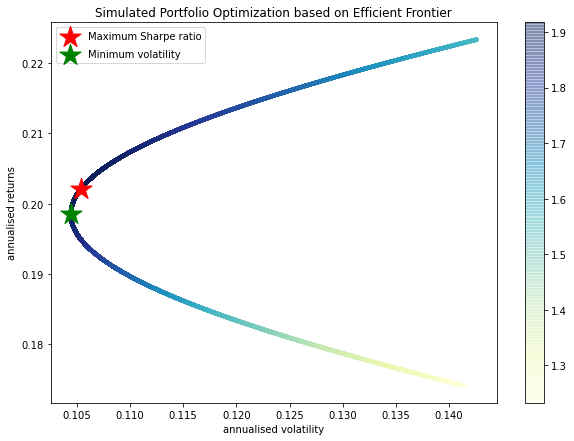

In [94]:
max_return_weight , ann_ret_max_ret , ann_sd_max_ret =display_simulated_ef_with_random_max_return(mean_returns[list_max_return],cov_matrix_ret,num_portfolios,risk_free_rate)

In [95]:
def display_simulated_ef_with_random_max_sharp(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=nav_df_pivot_drop_1200[list_max_sharp].columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=nav_df_allYear[list_max_sharp].columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    ann_ret = round(rp,6)
    ann_sd = round(sdp,6)
    
    print ("-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,6))
    print ("Annualised Volatility:", round(sdp,6))
    print ("\n")
    print( max_sharpe_allocation)
    print ("-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,6))
    print( "Annualised Volatility:", round(sdp_min,6))
    print ("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    return max_sharpe_allocation , ann_ret , ann_sd

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.014111
Annualised Volatility: 0.000923


proj_abbr_name  TMBTM   TSF
allocation      99.97  0.03
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.014058
Annualised Volatility: 0.000921


proj_abbr_name  TMBTM  TSF
allocation      100.0  0.0


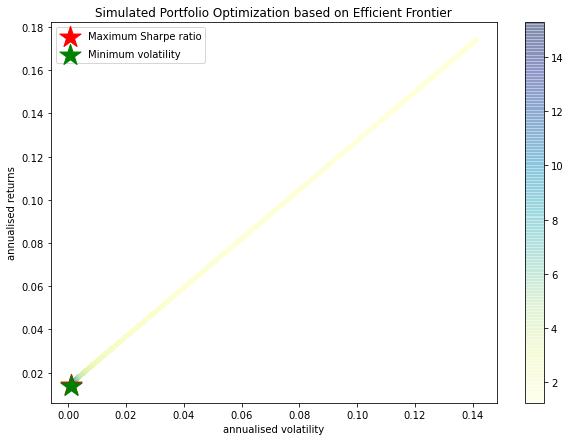

In [96]:
max_sharp_ret , ann_ret_max_sharp , ann_sd_max_sharp = display_simulated_ef_with_random_max_sharp(mean_returns[list_max_sharp],cov_matrix_sharp,num_portfolios,risk_free_rate)

In [97]:
def display_simulated_ef_with_random_min_sd(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=nav_df_pivot_drop_1200[list_min_sd].columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=nav_df_allYear[list_min_sd].columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    ann_ret = round(rp,6)
    ann_sd = round(sdp,6)
    
    print ("-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,6))
    print ("Annualised Volatility:", round(sdp,6))
    print ("\n")
    print( max_sharpe_allocation)
    print ("-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,6))
    print( "Annualised Volatility:", round(sdp_min,6))
    print ("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    return max_sharpe_allocation , ann_ret , ann_sd

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.008913
Annualised Volatility: 0.000583


proj_abbr_name  SCBTMF  ONEPROP-SG
allocation       99.96        0.04
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.008852
Annualised Volatility: 0.00058


proj_abbr_name  SCBTMF  ONEPROP-SG
allocation       100.0         0.0


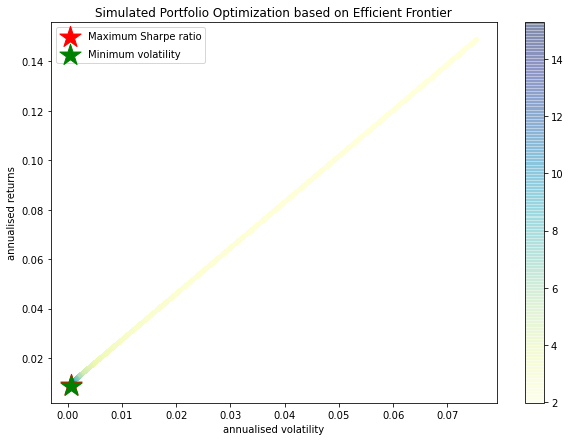

In [98]:
min_sd_weight , ann_ret_min_sd , ann_sd_min_sd = display_simulated_ef_with_random_min_sd(mean_returns[list_min_sd], cov_matrix_sd, num_portfolios, risk_free_rate)

In [99]:
# cov_matrix_CFP_Conservative = returns[list(sharpe_df[CFP_port_Conservative])].cov()
# cov_matrix_CFP_Moderate = returns[list(sharpe_df[CFP_port_Moderate])].cov()
# cov_matrix_CFP_Aggressive = returns[list(sharpe_df[CFP_port_Aggressive])].cov()


In [100]:
def display_simulated_ef_with_CFP(mean_returns, cov_matrix, risk_free_rate,weights):
    results, weights = calculated_portfolio(mean_returns, cov_matrix, risk_free_rate,weights),weights
    
    max_sharpe_idx = 0
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    
    print ("-"*80)
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print( list(cov_matrix.columns))
    print( list(weights))
    print ("-"*80)
    
    return sdp,rp

In [101]:
def calculated_portfolio(mean_returns, cov_matrix, risk_free_rate,weights):
    results = np.zeros((3,1))
    portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    results[0,0] = portfolio_std_dev
    results[1,0] = portfolio_return
    results[2,0] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results

In [102]:
display_simulated_ef_with_CFP(mean_returns[CFP_port_Conservative], returns[CFP_port_Conservative].cov(), risk_free_rate,CFP_port_Conservative_weight)

--------------------------------------------------------------------------------
Annualised Return: 0.05
Annualised Volatility: 0.04


['KT-ST', 'K-FIXED', 'ONE-DI', 'TMBABF', 'LHTPROP', 'ONE-EC14', 'K-VALUE', 'K-MIDSMALL', 'K-GOLD']
[0.1, 0.15, 0.15, 0.1, 0.2, 0.05, 0.1, 0.1, 0.05]
--------------------------------------------------------------------------------


(0.03977613271415363, 0.052382649210838766)

In [103]:
display_simulated_ef_with_CFP(mean_returns[CFP_port_Moderate], returns[CFP_port_Moderate].cov(), risk_free_rate,CFP_port_Moderate_weight)

--------------------------------------------------------------------------------
Annualised Return: 0.09
Annualised Volatility: 0.06


['K-FIXED', 'K-APB', 'LHTPROP', 'ONE-EC14', 'K-VALUE', 'K-MIDSMALL', 'ONE-UGG', 'K-GOLD']
[0.05, 0.1, 0.2, 0.1, 0.25, 0.1, 0.1, 0.1]
--------------------------------------------------------------------------------


(0.06172089881352953, 0.09000085596516731)

In [104]:
display_simulated_ef_with_CFP(mean_returns[CFP_port_Aggressive], returns[CFP_port_Aggressive].cov(), risk_free_rate,CFP_port_Aggressive_weight)

--------------------------------------------------------------------------------
Annualised Return: 0.09
Annualised Volatility: 0.08


['LHTPROP', 'ONE-EC14', 'K-VALUE', 'K-MIDSMALL', 'ONE-UGG', 'K-ASIA']
[0.1, 0.15, 0.15, 0.15, 0.25, 0.2]
--------------------------------------------------------------------------------


(0.07577740458570428, 0.08738005093965472)

In [105]:
investment = 5000
risk_acceptance = "low"

In [106]:
def estimate_portfolio(investment,risk_acceptance):
    if(risk_acceptance == "low"):
        results = calculate_inverstment(investment,min_sd_weight)
        return results
    elif(risk_acceptance == "mid"):
        results = calculate_inverstment(investment,max_sharp_ret)
        return results
    elif(risk_acceptance == "high"):
        results = calculate_inverstment(investment,max_return_weight)
        return results

In [107]:
def calculate_inverstment(investment_value , fund_allocation):
    results = np.zeros((fund_allocation.shape[1]))
    for fund_cal in range(0,fund_allocation.shape[1]):
        results[fund_cal] = (investment_value*fund_allocation[fund_allocation.columns[fund_cal]].allocation/100 ) / nav_fee_df[fund_allocation.columns[fund_cal]].iloc[-1]
    return results

In [108]:
mr_unit = estimate_portfolio(investment,"high")
mr_unit

array([86.78731152, 46.41463598])

In [109]:
max_return_weight , ann_ret_max_ret , ann_sd_max_ret

(proj_abbr_name  M-PROPERTY    TSF
 allocation           56.82  43.18,
 0.2021,
 0.1054)

In [110]:
max_sharp_ret , ann_ret_max_sharp , ann_sd_max_sharp 

(proj_abbr_name  TMBTM   TSF
 allocation      99.97  0.03,
 0.014111,
 0.000923)

In [111]:
min_sd_weight , ann_ret_min_sd , ann_sd_min_sd 

(proj_abbr_name  SCBTMF  ONEPROP-SG
 allocation       99.96        0.04,
 0.008913,
 0.000583)

In [112]:
df_export = pd.DataFrame(index=['fund','return','sd','buy_price','weight'],columns=['low','mid','high'])

In [113]:
df_export

low  mid high
fund       NaN  NaN  NaN
return     NaN  NaN  NaN
sd         NaN  NaN  NaN
buy_price  NaN  NaN  NaN
weight     NaN  NaN  NaN

In [114]:
risk_level=  ['low','mid','high']

In [124]:
for i in risk_level:
    print(i)
    if(i == "low"):
        df_export["low"].loc["fund"] = list(min_sd_weight.columns)
        df_export["low"].loc["return"] = ann_ret_min_sd
        df_export["low"].loc["sd"] = ann_sd_min_sd
        df_export["low"].loc["buy_price"] = list(nav_fee_df[min_sd_weight.columns].iloc[-1])
        df_export["low"].loc["weight"] = list(min_sd_weight.loc["allocation"])
    elif(i == "mid"):
        df_export["mid"].loc["fund"] = list(max_sharp_ret.columns)
        df_export["mid"].loc["return"] = ann_ret_max_sharp
        df_export["mid"].loc["sd"] = ann_sd_max_sharp
        df_export["mid"].loc["buy_price"] = list(nav_fee_df[max_sharp_ret.columns].iloc[-1])
        df_export["mid"].loc["weight"] = list(max_sharp_ret.loc["allocation"])
    elif(i == "high"):
        df_export["high"].loc["fund"] = list(max_return_weight.columns)
        df_export["high"].loc["return"] = ann_ret_max_ret
        df_export["high"].loc["sd"] = ann_sd_max_ret
        df_export["high"].loc["buy_price"] = list(nav_fee_df[max_return_weight.columns].iloc[-1])
        df_export["high"].loc["weight"] = list(max_return_weight.loc["allocation"])

low
mid
high


In [125]:
df_export

low                 mid                high
fund       [SCBTMF, ONEPROP-SG]        [TMBTM, TSF]   [M-PROPERTY, TSF]
return                 0.008913            0.014111              0.2021
sd                     0.000583            0.000923              0.1054
buy_price        [11.3545, 0.0]  [13.6281, 46.5155]  [32.7352, 46.5155]
weight            [99.96, 0.04]       [99.97, 0.03]      [56.82, 43.18]

In [126]:
df_export.to_json('../website/dataset/json_data.json')